# **Phân Tích Dữ Liệu Doanh Số Bán Hàng**

## Thành viên nhóm 1
1. Phan Minh Tân
2. Nguyễn Quốc Bảo
3. Trần Nguyễn Phước Trí

## Cài đặt thư viện

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Đọc Dữ Liệu

In [ ]:
data_path = "/content/drive/MyDrive/DataAnalysis/DoAn/dataset-3.csv"
data = pd.read_csv(data_path, index_col='InvoiceNo')
data.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Tiền xử lý và làm sạch dữ liệu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB



- **Tổng số mục**: Có tổng cộng 541,909 mục nhập trong DataFrame.
- **Cột và Kiểu Dữ Liệu**:
  - `StockCode`: Mã hàng (541,909 mục không null, kiểu dữ liệu `object`).
  - `Description`: Mô tả sản phẩm (540,455 mục không null, kiểu dữ liệu `object`). Có một số mục null trong cột này cần được xử lý hoặc điền thông tin.
  - `Quantity`: Số lượng (541,909 mục không null, kiểu dữ liệu `int64`).
  - `InvoiceDate`: Ngày hóa đơn (541,909 mục không null, kiểu dữ liệu `object`). Cần chuyển đổi kiểu dữ liệu sang datetime để thuận tiện hơn cho việc phân tích thời gian.
  - `UnitPrice`: Đơn giá (541,909 mục không null, kiểu dữ liệu `float64`).
  - `CustomerID`: ID Khách hàng (406,829 mục không null, kiểu dữ liệu `float64`). Có một lượng lớn giá trị null trong cột này, có thể ảnh hưởng đến việc phân tích khách hàng.
  - `Country`: Quốc gia (541,909 mục không null, kiểu dữ liệu `object`).

In [ ]:
data.nunique()

StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Phân Tích Số Lượng Giá Trị Duy Nhất Trong Mỗi Cột
- **StockCode**: Có 4,070 mã hàng duy nhất.
- **Description**: Có 4,223 mô tả sản phẩm duy nhất, cao hơn số lượng mã hàng, có thể do mỗi mã hàng có nhiều biến thể mô tả.
- **Quantity**: Có 722 giá trị số lượng duy nhất.
- **InvoiceDate**: Có 23,260 ngày hóa đơn duy nhất, cho thấy dữ liệu bao gồm một khoảng thời gian rộng lớn và nhiều giao dịch diễn ra mỗi ngày.
- **UnitPrice**: Có 1,630 giá bán duy nhất, phản ánh sự đa dạng trong giá cả sản phẩm.
- **CustomerID**: Có 4,372 khách hàng duy nhất được ghi nhận.
- **Country**: Có 38 quốc gia duy nhất, cho thấy phạm vi địa lý rộng lớn của dữ liệu.

In [ ]:
data.duplicated().values.any()

True

In [ ]:
data.duplicated().sum()

5848

In [ ]:
percentage_duplicated = (data.duplicated().sum() / len(data)) * 100

print(f'Phần trăm dữ liệu bị trùng lặp là : {percentage_duplicated:.3f}')

Phần trăm dữ liệu bị trùng lặp là : 1.079


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().values.any()

False

In [ ]:
data.isnull().sum()

StockCode           0
Description      1453
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134497
Country             0
dtype: int64

Ta thấy có dữ liệu null ở các cột **`Description`**     và **`CustomerID`**     

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536061.000000,536061.000000,401564.000000
mean,9.646148,4.631014,15281.200242
std,218.855105,97.285571,1714.035339
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16788.000000
max,80995.000000,38970.000000,18287.000000


 1. Số lượng (`Quantity`):
- Có tổng cộng 541,909 bản ghi. Tuy nhiên, giá trị trung bình là 9.55 cho thấy đa số giao dịch có số lượng sản phẩm ở mức vừa phải, nhưng độ lệch chuẩn rất lớn (218.08), chỉ ra sự phân tán lớn trong dữ liệu số lượng sản phẩm trong các giao dịch.
- Giá trị min là -80995, điều này không bình thường vì số lượng không thể âm và cho thấy có thể có các giao dịch trả hàng hoặc lỗi nhập liệu.
- Giá trị max là 80995, cho thấy có sự chênh lệch lớn về số lượng sản phẩm được mua trong một số giao dịch.

 2. Giá Đơn Vị (`UnitPrice`):
- Giá trung bình của sản phẩm là 4.61, với độ lệch chuẩn 96.76, cho thấy giá các sản phẩm cũng rất phân tán, và có thể có một số sản phẩm với giá rất cao so với mức trung bình.
- Giá trị âm trong `UnitPrice` (-11062.06) là không hợp lý vì giá không thể âm, có thể là lỗi nhập liệu.
- Giá trị cao nhất là 38970, cho thấy có sự chênh lệch lớn về giá giữa các sản phẩm.

 3. Mã Khách Hàng (`CustomerID`):
- Chỉ có 406,829 bản ghi có `CustomerID`, cho thấy có một số giao dịch không ghi nhận được thông tin khách hàng.
- Giá trị `CustomerID` phân bố từ 12346 đến 18287, cho thấy có sự đa dạng về khách hàng tham gia vào các giao dịch.


In [ ]:
instances =(data['Quantity'] <= 0).sum()
percent = instances / (data['Quantity'] ).count()
print('Total number of instances that have negative quantity values: %d -> %f%%'%(instances, percent *100))

Total number of instances that have negative quantity values: 10585 -> 1.974589%


Tổng số lượng các trường hợp mà giá trị `Quantity` là âm là 10,624, chiếm khoảng 1.96% tổng số lượng các bản ghi `Quantity` trong tập dữ liệu.


In [ ]:
instances =(data['UnitPrice'] <= 0).sum()
percent = instances / (data['UnitPrice'] ).count()
print("Total number of instances that have negative unit_price values: %d -> %f%%" % (instances, percent *100) )

Total number of instances that have negative unit_price values: 2510 -> 0.468230%


Tổng số lượng các trường hợp mà giá trị `UnitPrice` là không dương (bao gồm cả giá trị bằng không và âm) là 2,517, chiếm khoảng 0.464% tổng số lượng các bản ghi `UnitPrice` trong tập dữ liệu.

In [ ]:
instances = ((data['UnitPrice'] <= 0) & (data['Quantity'] <= 0) & (data['CustomerID'].isnull())).sum()
percent = instances/(data['UnitPrice']).count()
print('Total number of instances that have negative quantity values: %d -> %f%%'%(instances, percent *100))

Total number of instances that have negative quantity values: 1334 -> 0.248852%


Tổng số lượng các trường hợp mà giá trị `UnitPrice` và `Quantity` đều không dương và không có thông tin `CustomerID` là 1,336, chiếm khoảng 0.247% tổng số lượng các bản ghi `UnitPrice` trong tập dữ liệu.

In [ ]:
null_data = data[data.isnull().any(axis=1)]
null_data.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
new_data = data.dropna()
new_data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
new_data = new_data[(new_data['UnitPrice'] > 0) & (new_data['Quantity'] > 0)]
new_data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
new_data.describe()

,Quantity,UnitPrice,CustomerID
count,392652.000000,392652.000000,392652.000000
mean,13.119819,3.125890,15287.884865
std,180.501703,22.242936,1713.569265
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### Xử lý giá trị ngoại biên

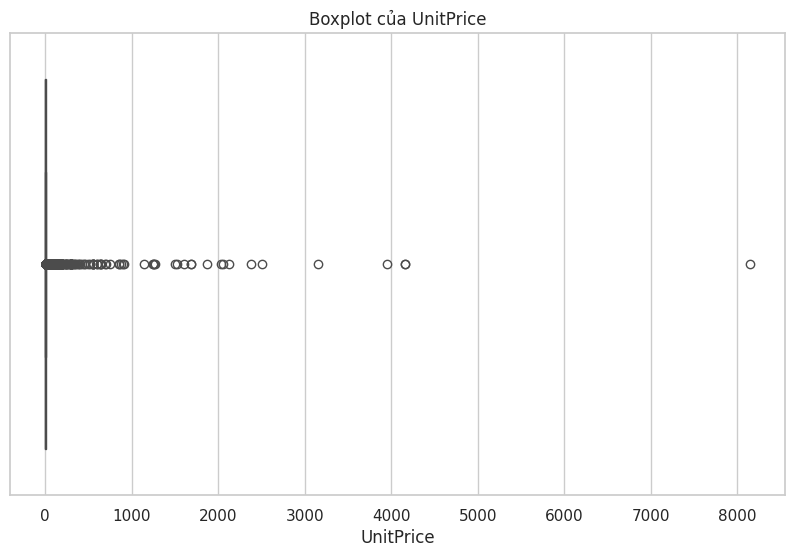

In [ ]:
sns.set(style="whitegrid")

# Vẽ boxplot cho UnitPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_data['UnitPrice'])
plt.title('Boxplot của UnitPrice')
plt.show()

Ta thấy có một giá trị ngoại lai, cho thấy có một giá trị của `UnitPrice` ở điểm gần 8000, ở đây nếu để yên sẽ làm cho tệp dữ liệu bị mất cân bằng, dẫn đến sai lệch trong quá trình phân tích nên vì thế nhóm em quyết định chỉ lấy các giá trị `UnitPrice` từ 5000 trở về trước.

In [ ]:
new_data = new_data[new_data.UnitPrice < 5000]
new_data.describe()


,Quantity,UnitPrice,CustomerID
count,392651.000000,392651.000000,392651.000000
mean,13.119849,3.105160,15287.882978
std,180.501931,18.055881,1713.571039
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,4161.060000,18287.000000


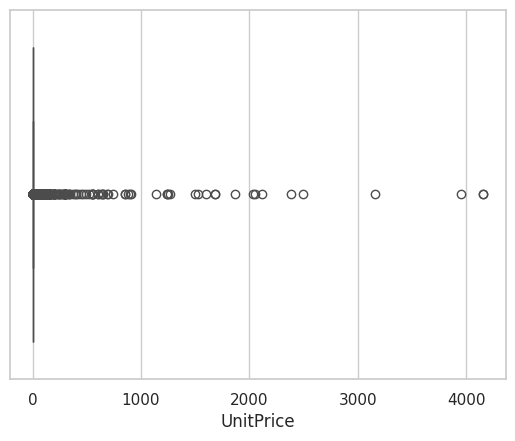

In [ ]:
up_new = sns.boxplot(new_data.UnitPrice, orient='h')

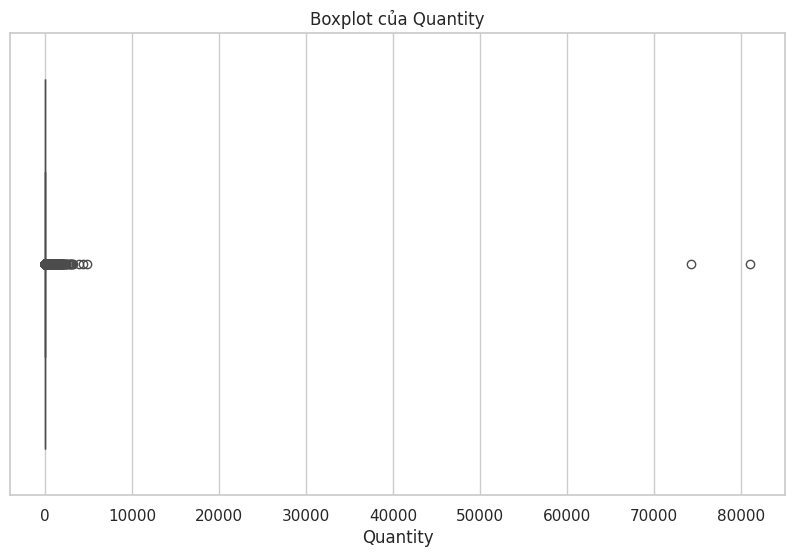

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_data['Quantity'])
plt.title('Boxplot của Quantity')
plt.show()

- Phần lớn các giá trị Quantity nằm trong một phạm vi nhỏ gần giá trị zero trên trục số, có nghĩa là hầu hết các đơn hàng có số lượng mua không quá 10000.
- Tuy nhiên vẫn có vài giá trị cao bất thường ở khoảng 70000- 80000. Đây là một điểm bất thường, có thể xảy ra nhẫm lẫn trong lúc nhập dữ liệu. Nên ta sẽ loại các giá trị này đi.


In [ ]:
new_data = new_data[new_data.Quantity < 20000]
new_data.describe()

,Quantity,UnitPrice,CustomerID
count,392649.000000,392649.000000,392649.000000
mean,12.724627,3.105168,15287.887520
std,43.084540,18.055926,1713.567975
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,4800.000000,4161.060000,18287.000000


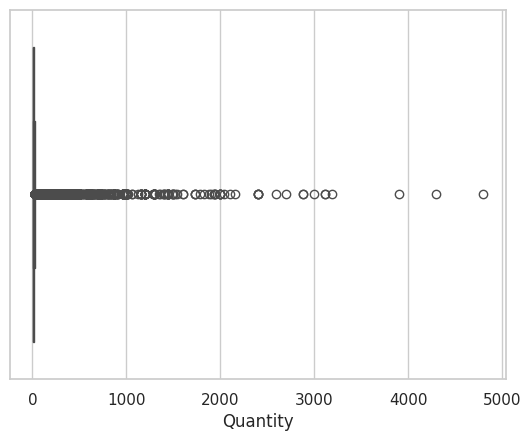

In [ ]:
q_new = sns.boxplot(new_data.Quantity, orient='h')

In [ ]:
new_data[(new_data.Description.isnull()) & (new_data.CustomerID.isnull())]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392649 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    392649 non-null  object 
 1   Description  392649 non-null  object 
 2   Quantity     392649 non-null  int64  
 3   InvoiceDate  392649 non-null  object 
 4   UnitPrice    392649 non-null  float64
 5   CustomerID   392649 non-null  float64
 6   Country      392649 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.0+ MB


### Chuẩn hóa dữ liệu

In [ ]:
new_data['Description'] = new_data['Description'].str.strip().str.upper()
new_data['StockCode'] = new_data['StockCode'].str.strip()
new_data.head()


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


 - Chuẩn hóa dữ liệu `Description`: loại bỏ khoảng trắng thừa và chuyển đổi sang chữ hoa.

- Đối với `StockCode`, ta sẽ kiểm tra xem có khoảng trắng thừa nào không và loại bỏ chúng.

In [ ]:
new_data['InvoiceDate'] = pd.to_datetime(new_data['InvoiceDate'])
new_data['CustomerID'] = new_data['CustomerID'].astype(int)
new_data['Quantity'] = new_data['Quantity'].astype(int)

new_data['TotalPrice'] = new_data['Quantity'] * new_data['UnitPrice']
new_data['YearMonth'] = new_data['InvoiceDate'].dt.to_period('M')
new_data['Year'] = new_data['InvoiceDate'].dt.year
new_data['Month'] = new_data['InvoiceDate'].dt.month_name()
new_data['Day'] = new_data['InvoiceDate'].dt.day
new_data['Day_of_week'] = new_data['InvoiceDate'].dt.day_name()
new_data['IsWeekend'] = new_data['Day_of_week'].isin(['Saturday', 'Sunday'])
new_data['Hour'] = new_data['InvoiceDate'].dt.hour
new_data['Minute'] = new_data['InvoiceDate'].dt.minute
new_data.head()


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Year,Month,Day,Day_of_week,IsWeekend,Hour,Minute
InvoiceNo,,,,,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,December,1,Wednesday,False,8,26
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,December,1,Wednesday,False,8,26
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26


**Chuyển Đổi Kiểu Dữ Liệu**
- Chuyển đổi cột 'InvoiceDate' sang kiểu dữ liệu datetime.
- Chuyển đổi 'CustomerID' sang kiểu số nguyên. Điều này giả định rằng tất cả ID khách hàng đều có thể biểu diễn dưới dạng số nguyên và không có giá trị null.
- Đảm bảo rằng cột 'Quantity' là kiểu số nguyên, hợp lý với bản chất "số lượng" của nó.

**Tạo các thuộc tính**
- `TotalPrice`: Tính tổng giá trị cho mỗi giao dịch bằng cách nhân số lượng với đơn giá.
- `YearMonth`,`Year`, `Month`, `Day`: Trích xuất năm, tháng (dưới dạng tên tháng), và ngày từ 'InvoiceDate'.
- `Day_of_week`: Xác định ngày trong tuần (ví dụ: Thứ Hai, Thứ Ba, ...) từ 'InvoiceDate'.
- `IsWeekend`: Tạo một cột boolean mới để xác định liệu giao dịch có xảy ra vào cuối tuần hay không.
- `Hour`, `Minute`: Trích xuất giờ và phút từ 'InvoiceDate', giúp phân tích dữ liệu theo thời gian trong ngày.

In [ ]:
new_data.shape

(392649, 16)

## Trực Quan Hóa Dữ Liệu

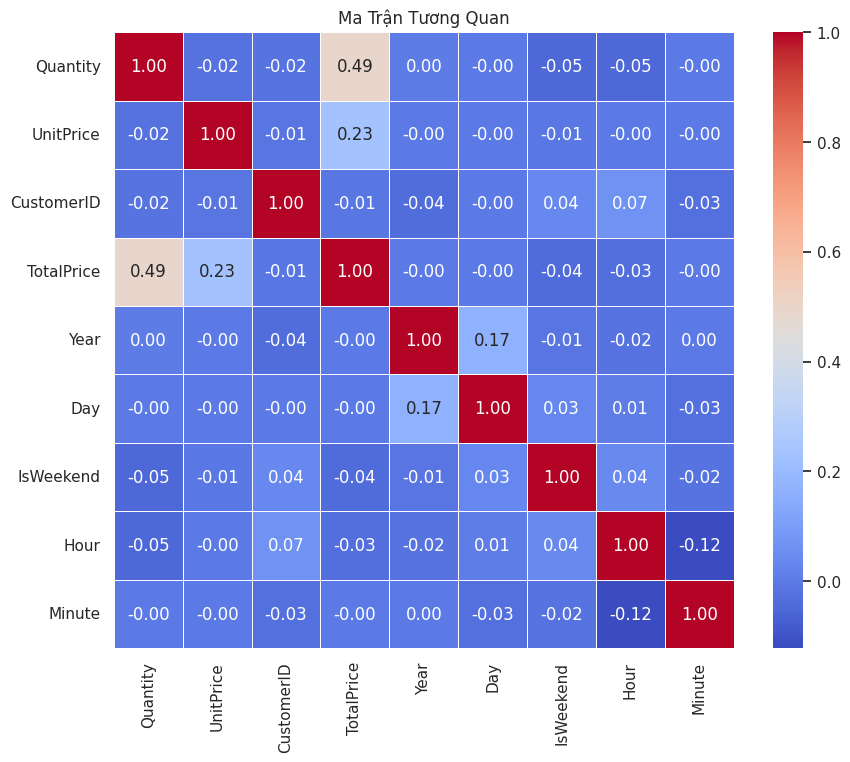

In [ ]:
corr = new_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma Trận Tương Quan')

plt.show()


1. **Quantity và TotalPrice:** Có một tương quan tích cực mạnh (0.49), điều này có nghĩa là khi số lượng sản phẩm trong một đơn hàng tăng thì tổng giá trị đơn hàng cũng tăng theo, điều này khá hợp lý trong bối cảnh bán lẻ.
2. **UnitPrice và TotalPrice:** Cũng có một tương quan tích cực nhất định (0.23), cho thấy mặt hàng có giá đơn vị cao hơn có xu hướng tạo ra doanh thu cao hơn cho mỗi đơn hàng.

In [ ]:
countries_purchases = new_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
countries_purchases

Country
United Kingdom    4085616
Netherlands        200361
EIRE               140133
Germany            119153
France             111428
Australia           83891
Sweden              36078
Switzerland         30082
Spain               27933
Japan               26016
Name: Quantity, dtype: int64

In [ ]:
new_data['InvoiceDate'] = pd.to_datetime(new_data['InvoiceDate'])
min_date = new_data['InvoiceDate'].min()
max_date = new_data['InvoiceDate'].max()

print(f"Khoảng thời gian dữ liệu từ: {min_date} đến {max_date}")


Khoảng thời gian dữ liệu từ: 2010-12-01 08:26:00 đến 2011-12-09 12:50:00


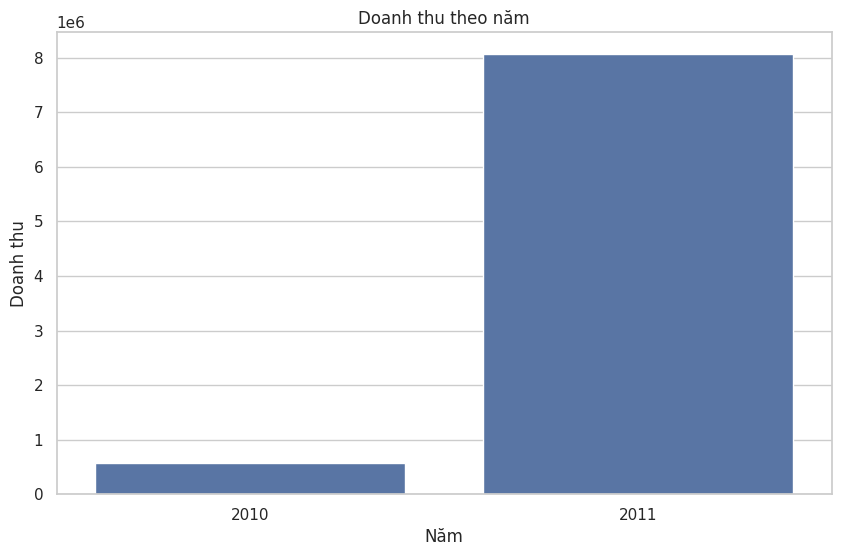

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='TotalPrice', data=new_data, estimator=sum, errorbar=None)
plt.title('Doanh thu theo năm')
plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.show()

In [ ]:
new_data_reset = new_data.reset_index()
ord_coun = new_data_reset.groupby(['Country'])['InvoiceNo'].count().sort_values()
ord_coun.head()

Country
Saudi Arabia       9
Bahrain           17
Czech Republic    25
Brazil            32
Lithuania         35
Name: InvoiceNo, dtype: int64

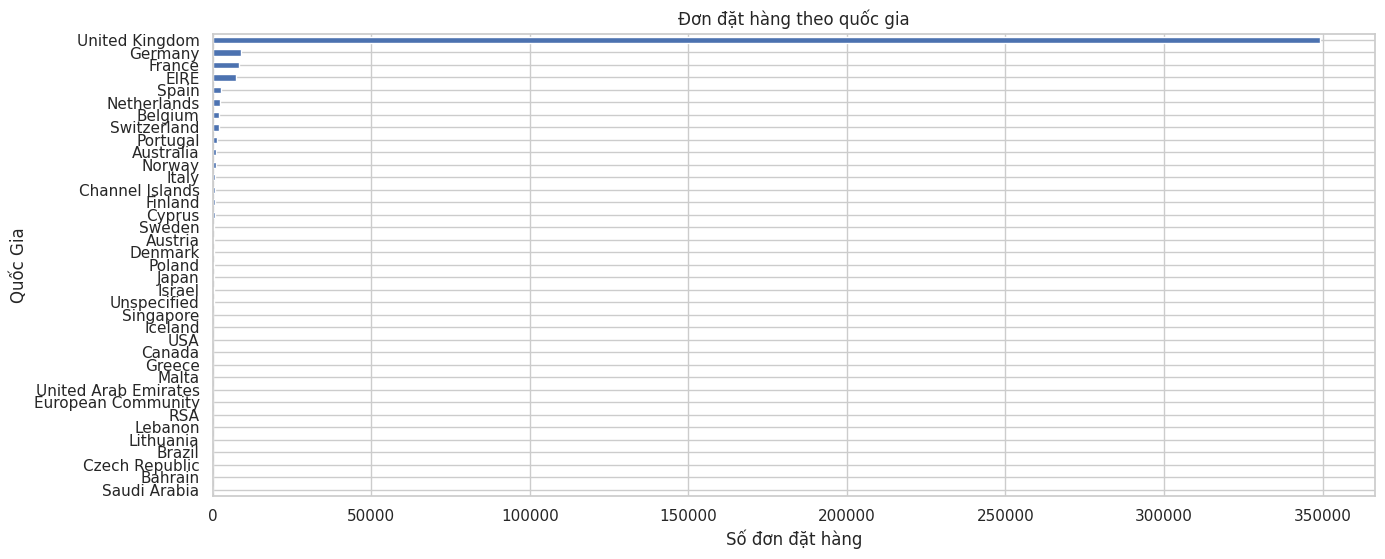

In [ ]:
ocoun = ord_coun.plot(kind='barh', figsize = (15, 6))
ocoun.set_xlabel('Số đơn đặt hàng')
ocoun.set_ylabel('Quốc Gia')
ocoun.set_title('Đơn đặt hàng theo quốc gia')
plt.show()

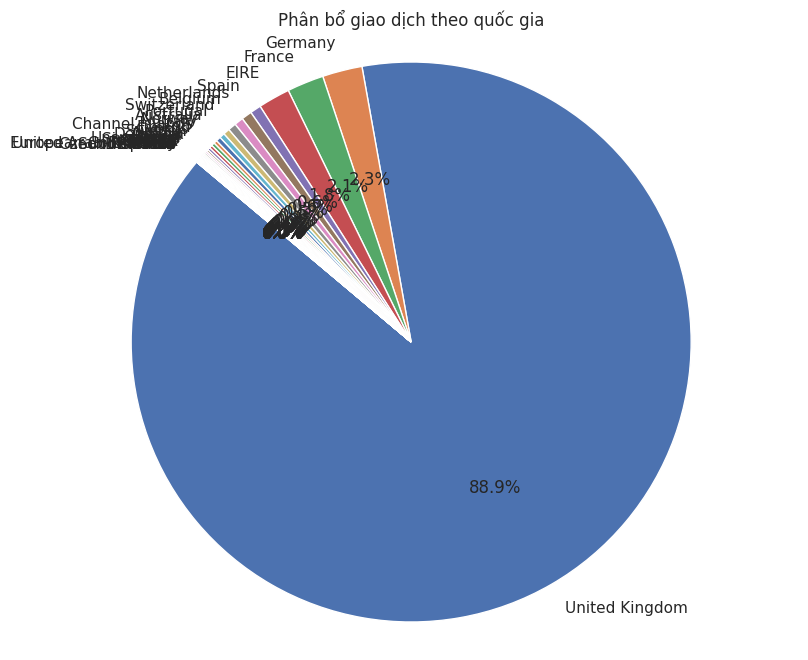

In [ ]:
transactions_by_country_df = ord_coun.to_frame().reset_index()
transactions_by_country_df.sort_values(by='InvoiceNo', ascending=False, inplace=True)
plt.figure(figsize=(10, 8))
plt.pie(transactions_by_country_df['InvoiceNo'], labels=transactions_by_country_df['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Phân bổ giao dịch theo quốc gia')
plt.axis('equal')
plt.show()

**Phân Tích Giao Dịch Theo Quốc Gia**

Trong biểu đồ phân bổ giao dịch theo quốc gia, ta thấy rằng:

- Vương quốc Anh (UK) chiếm ưu thế đáng kể so với các quốc gia khác, với tỷ lệ 88.9% tổng số giao dịch.
- Sự chênh lệch lớn này có thể ảnh hưởng đến hiểu biết về hành vi mua hàng trên toàn tập dữ liệu.


In [ ]:
del ord_coun['United Kingdom']

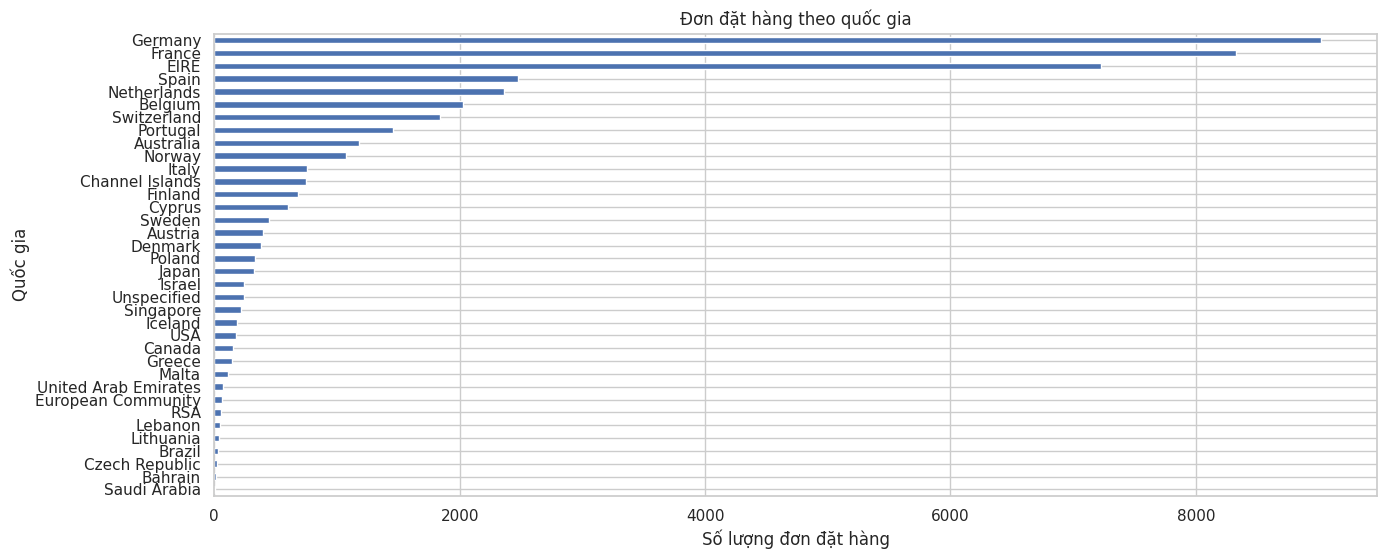

In [ ]:
ocoun2 = ord_coun.plot(kind='barh', figsize = (15, 6))
ocoun2.set_xlabel('Số lượng đơn đặt hàng')
ocoun2.set_ylabel('Quốc gia')
ocoun2.set_title('Đơn đặt hàng theo quốc gia')
plt.show()

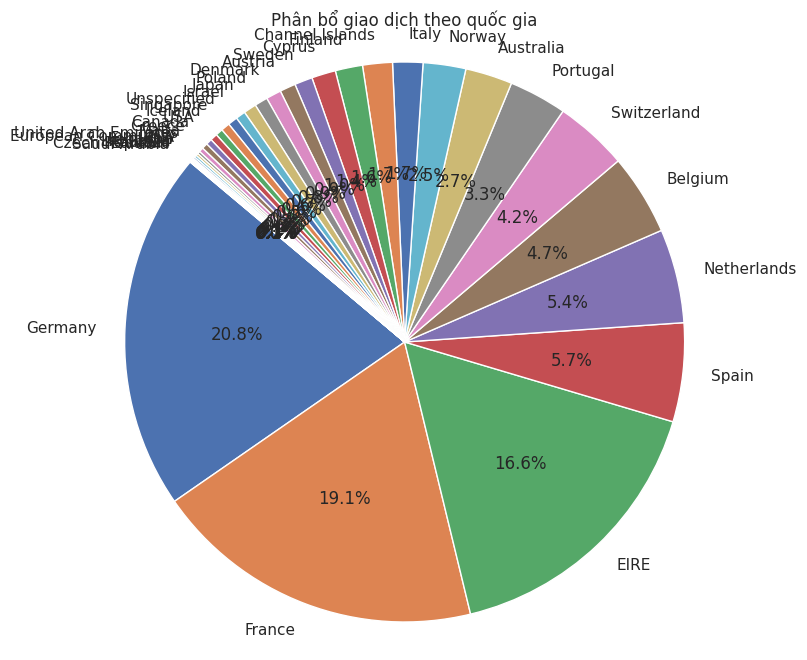

In [ ]:
transactions_by_country_df = ord_coun.to_frame().reset_index()
transactions_by_country_df.sort_values(by='InvoiceNo', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
plt.pie(transactions_by_country_df['InvoiceNo'], labels=transactions_by_country_df['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Phân bổ giao dịch theo quốc gia')
plt.axis('equal')
plt.show()

In [ ]:
uk_data = new_data[new_data['Country'] == 'United Kingdom']
uk_data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Year,Month,Day,Day_of_week,IsWeekend,Hour,Minute
InvoiceNo,,,,,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,December,1,Wednesday,False,8,26
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,December,1,Wednesday,False,8,26
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40,2011-12,2011,December,9,Friday,False,12,31
581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011-12,2011,December,9,Friday,False,12,49
581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00,2011-12,2011,December,9,Friday,False,12,49


In [ ]:
non_uk_data = new_data[new_data['Country'] != 'United Kingdom']
non_uk_data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Year,Month,Day,Day_of_week,IsWeekend,Hour,Minute
InvoiceNo,,,,,,,,,,,,,,,,
536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.00,2010-12,2010,December,1,Wednesday,False,8,45
536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.00,2010-12,2010,December,1,Wednesday,False,8,45
536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.00,2010-12,2010,December,1,Wednesday,False,8,45
536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583,France,10.20,2010-12,2010,December,1,Wednesday,False,8,45
536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,15.60,2010-12,2010,December,1,Wednesday,False,8,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,2011,December,9,Friday,False,12,50
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,2011,December,9,Friday,False,12,50
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011,December,9,Friday,False,12,50


## Phân tích dữ liệu

### Danh sách câu hỏi:
1.	Số lượng sản phẩm bán ra trung bình trên mỗi hóa đơn là bao nhiêu?
2.	Số lượng sản phẩm phổ biến trong dữ liệu là những sản phẩm nào?
3.	Các khách hàng nào có số lượng giao dịch nhiều nhất?
4.	Số lượng giao dịch của 10 quốc gia có số lượng giao dịch nhiều nhất trong dữ liệu?
5.	Số lượng đơn hàng trung bình mỗi tháng là bao nhiêu ?
6.	Mối quan hệ giữa Quantity và UnitPrice là gì?
7.	Có sự khác biệt về giá trung bình của sản phẩm giữa các quốc gia không?
8.	Số lượng sản phẩm bán ra có phụ thuộc vào thời gian trong ngày không?
9.	Doanh số bán hàng có xu hướng thay đổi theo các ngày trong tuần không?
10.	Tổng doanh thu có liên quan đến số lượng sản phẩm bán ra trên mỗi hóa đơn không?
11.	Các quốc gia khác nhau có mẫu hành vi mua hàng khác nhau qua các tháng không?
12.	Thời gian trong ngày có ảnh hưởng như thế nào đến Quantity và TotalPrice?
13.	Số lượng sản phẩm bán ra có liên quan đến các mùa khác nhau trong năm không?
14.	Số lượng đơn hàng trung bình trên mỗi khách hàng là bao nhiêu?
15.	Doanh thu bán hàng theo tháng có xu hướng như thế nào?
16.	Doanh số của các ngày trong tuần với các ngày cuối tuần chênh lệch nhau như thế nào ?
17.	Số lượng các sản phẩm được bán vào mỗi ngày trong tuần như thế nào?
18.	Mất bao nhiêu lâu để khách hàng quay lại?
19.	Quốc gia nào có số lượng khách hàng quay lại nhiều nhất?
20.	Sự biến động doanh thu hằng ngài có gì đặc biệt không?
21.	Các quốc gia có số lượng sản phẩm bán được theo tháng cao nhất là tháng nào và số lượng bao nhiêu ?
22.	Tổng số lượng sản phẩm bán theo tháng ở Anh là bao nhiêu?
23.	Top các sản phảm bán chạy nhất của Vương quốc Anh là những sản phẩm nào?
24.	Các sản phẩm được bán trong tháng 11 là sản phẩm nào?
25.	Các sản phẩm nào được bán cao nhất của mỗi tháng?
26.	Hành vi mua sắm của các khách hàng hàng đầu sẽ như thế nào?



#### Câu 1. Số lượng sản phẩm bán ra trung bình trên mỗi hóa đơn là bao nhiêu?

The average quantity sold per invoice is: 269.6773357802127


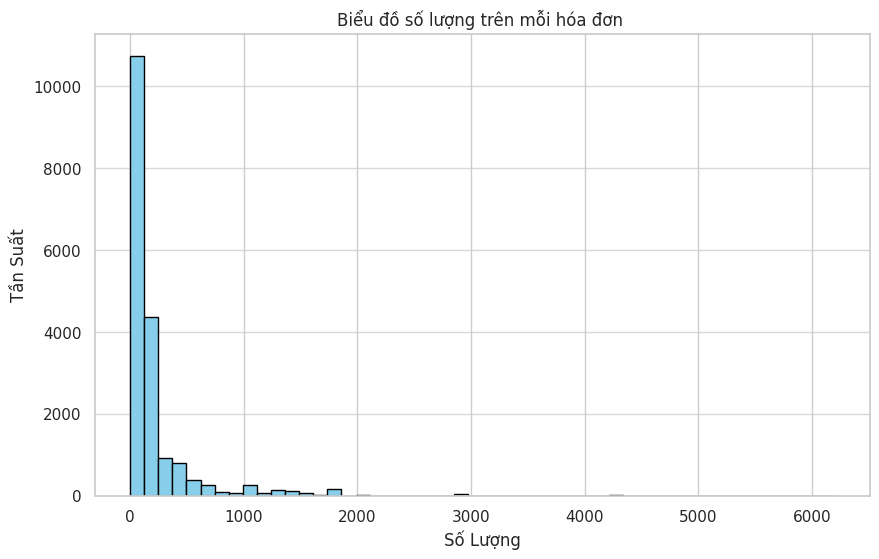

In [ ]:
invoice_quantities =new_data.groupby('InvoiceNo')['Quantity'].sum()
average_quantity = invoice_quantities.mean()
print(f"The average quantity sold per invoice is: {average_quantity}")

plt.figure(figsize=(10, 6))
plt.hist(invoice_quantities[invoice_quantities], bins=50, color='skyblue', edgecolor='black')
plt.title('Biểu đồ số lượng trên mỗi hóa đơn ')
plt.xlabel('Số Lượng')
plt.ylabel('Tần Suất')
plt.grid(axis='y', alpha=0.75)

plt.show()

Biểu đồ histogram trên phản ánh sự phân bố của tổng số lượng sản phẩm trên mỗi hóa đơn. Nhìn vào biểu đồ, chúng ta có thể thấy rằng:

- **Phần lớn các hóa đơn có số lượng sản phẩm ít:** Điều này cho thấy các giao dịch nhỏ là phổ biến trong dữ liệu. Đa số các hóa đơn tập trung ở phần thấp của trục số lượng, cho thấy sự nghiêng về các đơn hàng có ít sản phẩm.

- **Sự phân bố rộng của số lượng sản phẩm trên hóa đơn:** Biểu đồ cũng cho thấy một sự phân bố rộng, với một số hóa đơn có số lượng sản phẩm rất lớn. Điều này chỉ ra rằng, bên cạnh các giao dịch nhỏ, cũng có những giao dịch lớn được thực hiện, dù chúng không chiếm đa số.

- **Số lượng sản phẩm bán ra trung bình trên mỗi hóa đơn khoảng 269,68:** Con số này phản ánh một sự đa dạng trong kích thước của các đơn hàng. Mặc dù số lượng trung bình cao, nhưng điều quan trọng cần nhớ là biểu đồ có một số ít hóa đơn với số lượng sản phẩm rất lớn, có thể làm tăng giá trị trung bình này.

Nhìn chung, biểu đồ và phân tích cho thấy sự đa dạng trong hành vi mua sắm của khách hàng, từ những đơn hàng nhỏ cho đến những đơn hàng lớn.


#### Câu 2. Số lượng sản phẩm phổ biến trong dữ liệu là những sản phẩm nào?

Text(0, 0.5, 'Mô Tả Sản Phẩm')

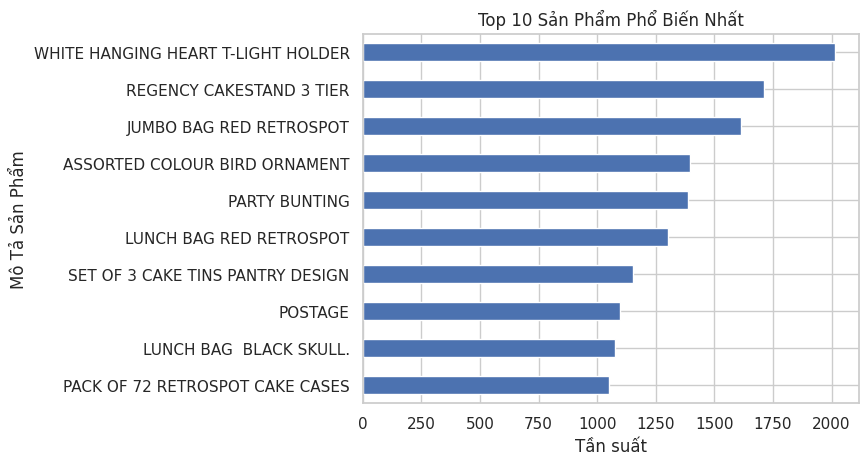

In [ ]:
unique_products_count = new_data['Description'].nunique()
product_counts = new_data['Description'].value_counts().head(10)
product_counts.plot(kind='barh').invert_yaxis()
plt.title('Top 10 Sản Phẩm Phổ Biến Nhất')
plt.xlabel('Tần suất')
plt.ylabel('Mô Tả Sản Phẩm')

Biểu đồ thanh này hiển thị Top 10 Sản Phẩm Phổ Biến Nhất dựa trên tần suất xuất hiện trong dữ liệu. Các sản phẩm được sắp xếp từ ít phổ biến nhất (ở dưới cùng) đến phổ biến nhất (ở trên cùng). Dựa vào biểu đồ, chúng ta có thể thấy:

- **Sản phẩm "WHITE HANGING HEART T-LIGHT HOLDER" có tần suất cao nhất**, cho thấy đây là mặt hàng được ưa chuộng nhất trong số dữ liệu được phân tích.
- Các sản phẩm tiếp theo như **"REGENCY CAKESTAND 3 TIER"** và **"JUMBO BAG RED RETROSPOT"** cũng rất được ưa chuộng, với tần suất đáng kể so với phần còn lại của danh sách.
- Một điểm đáng chú ý khác là **đa dạng của các loại sản phẩm trong Top 10**, từ vật dụng trang trí như **"ASSORTED COLOUR BIRD ORNAMENT"** và **"PARTY BUNTING"**, đến các sản phẩm dùng trong nhà bếp như **"SET OF 3 CAKE TINS PANTRY DESIGN"**.
- Điều này có thể phản ánh **xu hướng mua sắm** của khách hàng và sự ưa chuộng của họ đối với các loại sản phẩm nhất định.

Từ biểu đồ, ta có thể nhận thấy rằng có một số sản phẩm nổi bật có mức độ ưa chuộng cao và xuất hiện thường xuyên trong các giao dịch, có thể đóng vai trò quan trọng trong việc lập kế hoạch tồn kho và chiến lược marketing.


 #### Câu 3. Các khách hàng nào có số lượng giao dịch nhiều nhất?

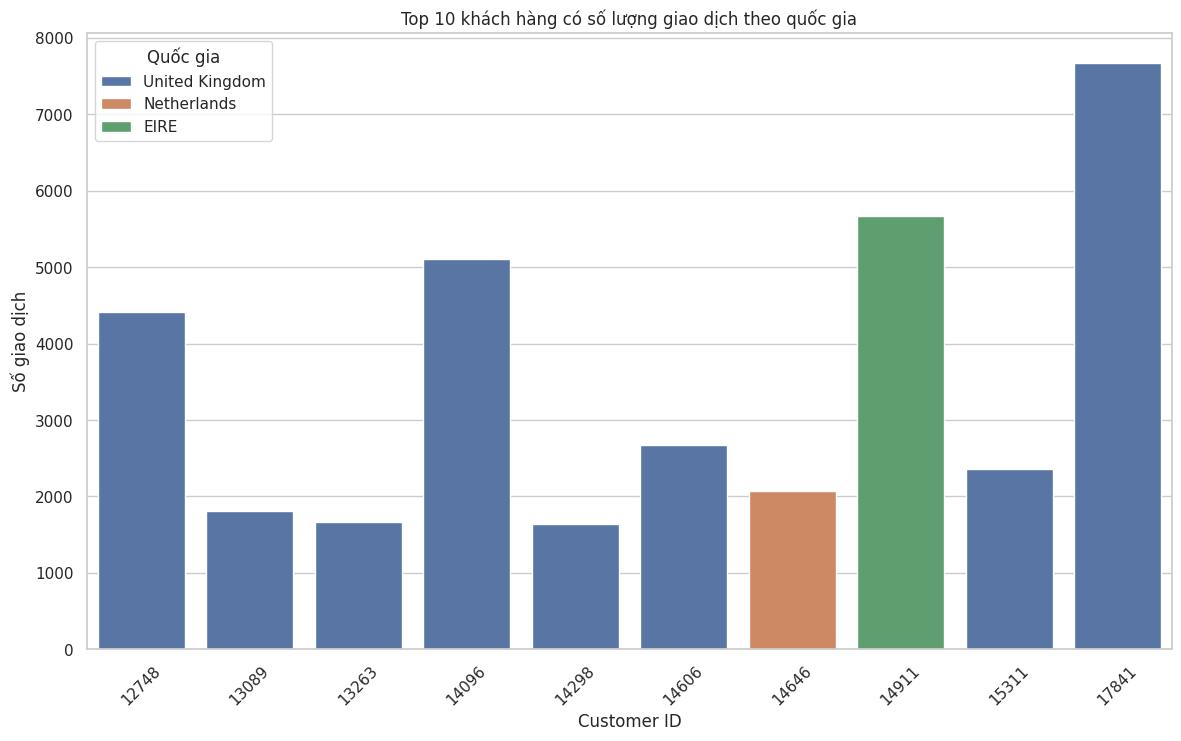

In [ ]:
top_customers = new_data['CustomerID'].value_counts().nlargest(10).index
top_customers_data = new_data[new_data['CustomerID'].isin(top_customers)]
top_customers_countries = top_customers_data.groupby('CustomerID')['Country'].first().reset_index()

top_customers_transaction_counts = new_data['CustomerID'].value_counts().reset_index()
top_customers_transaction_counts.columns = ['CustomerID', 'TransactionCount']
top_customers_visualization_data = pd.merge(top_customers_countries, top_customers_transaction_counts, on='CustomerID')


plt.figure(figsize=(14, 8))
sns.barplot(x='CustomerID', y='TransactionCount', data=top_customers_visualization_data, hue='Country', dodge=False)
plt.title('Top 10 khách hàng có số lượng giao dịch theo quốc gia')
plt.xlabel('Customer ID')
plt.ylabel('Số giao dịch')
plt.xticks(rotation=45)
plt.legend(title='Quốc gia')
plt.show()

 **Nhận xét về Biểu đồ Top 10 Khách Hàng Có Số Lượng Giao Dịch Theo Quốc Gia**

Biểu đồ này minh họa số lượng giao dịch của 10 khách hàng có tần suất mua hàng cao nhất. Mỗi cột biểu diễn một khách hàng duy nhất, và màu sắc định danh quốc gia mà họ đến từ đó:

- **Đa số khách hàng** đều có gốc từ **Vương quốc Anh** (màu xanh lam), phản ánh thị trường nội địa có hoạt động mua bán sôi nổi.
- Một khách hàng từ **Hà Lan** (màu da cam) có số lượng giao dịch nổi bật, chỉ sau khách hàng có số lượng giao dịch cao nhất từ **Vương quốc Anh**.
- Khách hàng từ **EIRE** (màu xanh lá) cũng thể hiện số lượng giao dịch cao, đánh bại nhiều khách hàng từ Vương quốc Anh, điều này có thể chỉ ra một thị trường quan trọng ngoài nước Anh.
- Khách hàng có `CustomerID` 17841 từ **Vương quốc Anh** dẫn đầu với số lượng giao dịch cao nhất, cho thấy họ là khách hàng rất tích cực.

Ta thấy các khách hàng đến từ Vương quốc Anh chiếm đa số do đây là dữ liệu chung, nên sẽ khó có thể đánh giá được các khách hàng nào đến từ các thị trường tìm năng.


3.1. Vậy các khách hàng có giao dịch nhiều nhất có xuất xứ ngoài Vương Quốc Anh thì sao?

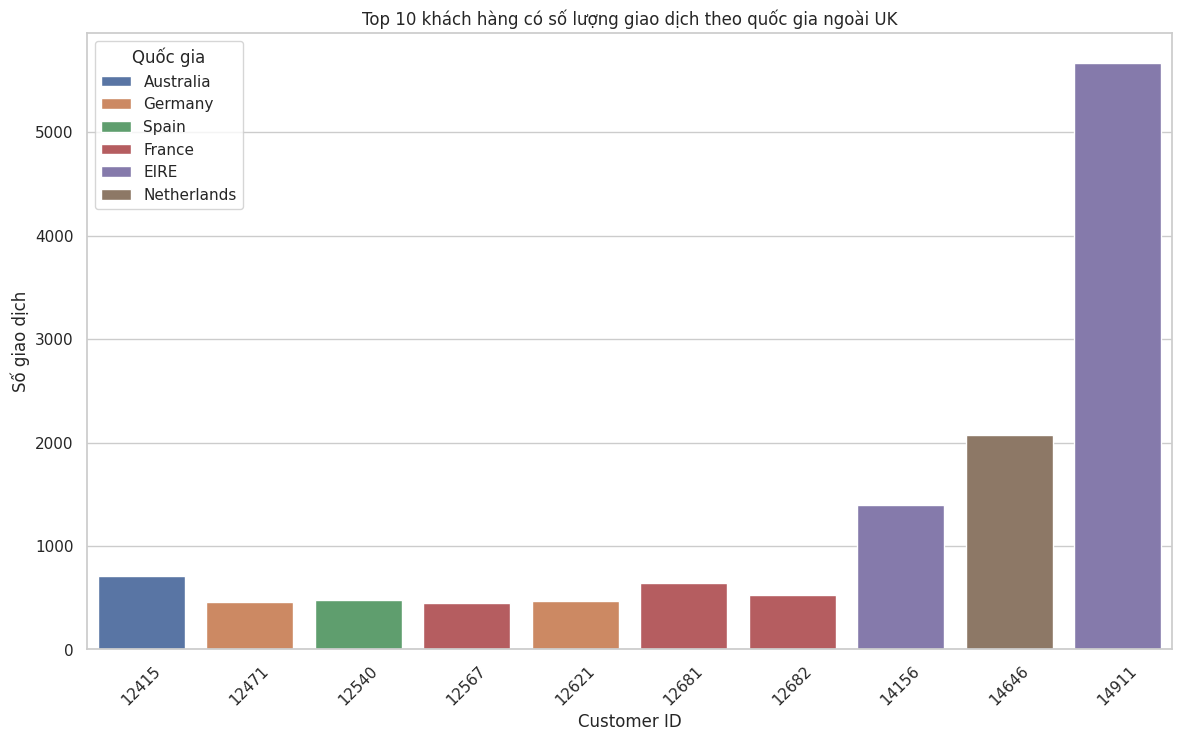

In [ ]:
top_customers_non_UK = non_uk_data['CustomerID'].value_counts().nlargest(10).index
top_customers_non_UK = non_uk_data[non_uk_data['CustomerID'].isin(top_customers_non_UK)]
top_customers_countries = top_customers_non_UK.groupby('CustomerID')['Country'].first().reset_index()

top_customers_transaction_counts = non_uk_data['CustomerID'].value_counts().reset_index()
top_customers_transaction_counts.columns = ['CustomerID', 'TransactionCount']
top_customers_visualization_data = pd.merge(top_customers_countries, top_customers_transaction_counts, on='CustomerID')


plt.figure(figsize=(14, 8))
sns.barplot(x='CustomerID', y='TransactionCount', data=top_customers_visualization_data, hue='Country', dodge=False)
plt.title('Top 10 khách hàng có số lượng giao dịch theo quốc gia ngoài UK')
plt.xlabel('Customer ID')
plt.ylabel('Số giao dịch')
plt.xticks(rotation=45)
plt.legend(title='Quốc gia')
plt.show()

**Phân tích Top 10 Khách hàng có số lượng giao dịch nhiều nhất tại các quốc gia ngoài UK**

Biểu đồ thể hiện rõ ràng số lượng giao dịch của từng khách hàng hàng đầu tại các thị trường quốc tế, không bao gồm Vương quốc Anh. Mỗi cột được tô màu khác nhau để đại diện cho mỗi quốc gia:

- Khách hàng từ **Netherlands** (`CustomerID`: 14646) nổi bật với số lượng giao dịch lớn nhất, xa vượt các khách hàng khác, thể hiện sự hoạt động mạnh mẽ của thị trường này.
- **EIRE** cũng góp mặt trong danh sách với `CustomerID`: 14911, cho thấy sự quan trọng của thị trường này đối với doanh nghiệp.
- Các khách hàng từ **Australia**, **Germany**, **Spain**, và **France** cũng góp mặt trong top này, mỗi quốc gia đều có ít nhất một khách hàng trong số 10 người mua nhiều nhất.
- Một điểm đáng chú ý là sự đa dạng của các thị trường quốc tế, không chỉ tập trung vào một vài quốc gia nhất định.
- Điều này có thể cung cấp cái nhìn sâu sắc về cơ hội và thách thức trong việc mở rộng và phục vụ các khách hàng quốc tế, đồng thời phản ánh sự phân bố địa lý của nhu cầu và sở thích của khách hàng.

#### Câu 4. Số lượng giao dịch của 10 quốc gia có số lượng giao dịch nhiều nhất trong dữ liệu?

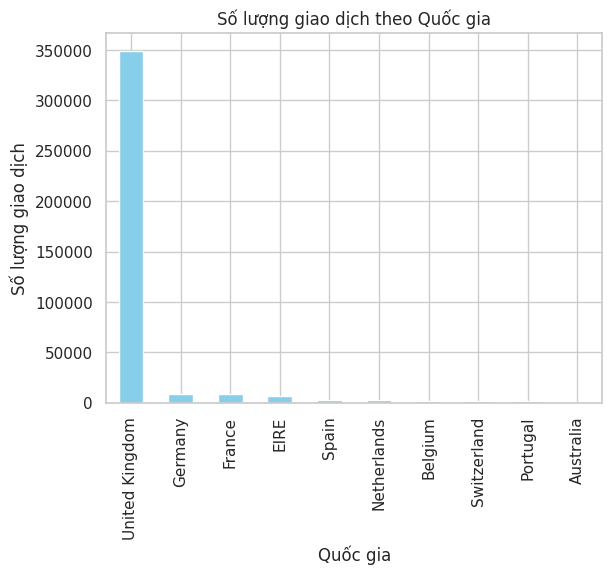

In [ ]:
transactions_per_country = new_data['Country'].value_counts().head(10)
country_most_transactions = transactions_per_country.idxmax()
most_transactions = transactions_per_country.max()
transactions_per_country.plot(kind='bar', color='skyblue')
plt.title('Số lượng giao dịch theo Quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng giao dịch')
plt.xticks(rotation=90)
plt.show()

Biểu đồ thanh trên thể hiện số lượng giao dịch của 10 quốc gia có số lượng giao dịch nhiều nhất trong dữ liệu. Vương Quốc Anh dẫn đầu với một khoảng cách lớn so với các quốc gia khác, điều này cho thấy sự tập trung cao của hoạt động kinh doanh tại đây.

Các nhận xét từ biểu đồ:

- **Vương Quốc Anh** không chỉ có số lượng giao dịch cao nhất mà còn vượt trội so với các quốc gia khác, điều này có thể cho thấy sự hiện diện mạnh mẽ của công ty hoặc thị trường tiêu thụ lớn.
- **Đức và Pháp** tiếp theo sau nhưng chỉ với một phần nhỏ so với Vương Quốc Anh, cho thấy rằng có thể còn nhiều cơ hội để tăng cường hoạt động kinh doanh tại các thị trường này.
- Sự chênh lệch lớn giữa Vương Quốc Anh và các quốc gia khác cũng gợi ý rằng có thể cần xem xét các chiến lược kinh doanh địa phương hoặc toàn cầu để tận dụng tốt hơn tiềm năng tại các thị trường ít khai thác hơn.
- Biểu đồ cung cấp một cái nhìn tổng quan về sự phân bố thị trường, điều quan trọng cho việc phát triển kế hoạch mở rộng hoặc tối ưu hóa hoạt động kinh doanh.


4.1 Số lượng giao dịch của 10 quốc gia có số lượng giao dịch nhiều nhất trong dữ liệu ngoại trừ Vương Quốc Anh?

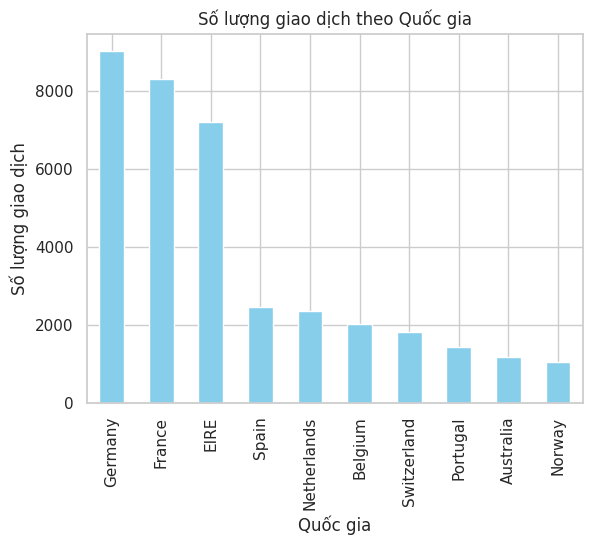

In [ ]:
transactions_per_country = non_uk_data['Country'].value_counts().head(10)
country_most_transactions = transactions_per_country.idxmax()
most_transactions = transactions_per_country.max()
transactions_per_country.plot(kind='bar', color='skyblue')
plt.title('Số lượng giao dịch theo Quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng giao dịch')
plt.xticks(rotation=90)
plt.show()


Biểu đồ cột này thể hiện số lượng giao dịch được thực hiện tại mỗi quốc gia, không bao gồm Vương quốc Anh. Từ biểu đồ, ta có thể rút ra một số nhận xét:

- **Đức (Germany)** dẫn đầu danh sách với số lượng giao dịch cao nhất, tiếp theo là **Pháp (France)** và **EIRE**, cho thấy sự phổ biến của thị trường và sản phẩm tại các quốc gia này.
- Có một sự giảm dần về số lượng giao dịch khi di chuyển từ trái sang phải của biểu đồ, với các quốc gia như **Tây Ban Nha (Spain)**, **Hà Lan (Netherlands)** và các quốc gia khác theo sau.
- **Bỉ (Belgium)**, **Thụy Sĩ (Switzerland)**, và **Bồ Đào Nha (Portugal)** có số lượng giao dịch tương đối bình đẳng, nhưng ít hơn đáng kể so với ba thị trường hàng đầu.
- Quốc gia có số lượng giao dịch ít nhất trên biểu đồ là **Na Uy (Norway)**, có thể phản ánh sự cần thiết phải đánh giá lại chiến lược hoặc cơ hội tại thị trường này.

#### Câu 5. Số lượng đơn hàng trung bình mỗi tháng là bao nhiêu ?

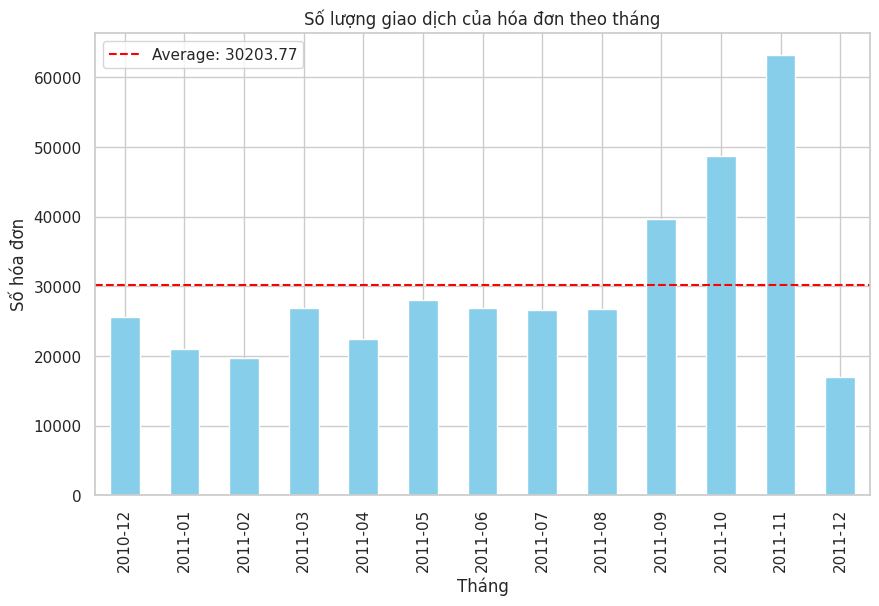

In [ ]:

monthly_invoice_counts = new_data.groupby('YearMonth').size()
average_invoices_per_month = monthly_invoice_counts.mean()

plt.figure(figsize=(10, 6))
monthly_invoice_counts.plot(kind='bar', color='skyblue')
plt.axhline(y=average_invoices_per_month, color='red', linestyle='--', label=f'Average: {average_invoices_per_month:.2f}')
plt.title('Số lượng giao dịch của hóa đơn theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số hóa đơn')
plt.xticks(rotation=90)
plt.legend()
plt.show()


5.1 Số lượng giao dịch của hóa đơn theo tháng của Vương Quốc Anh thì sao?

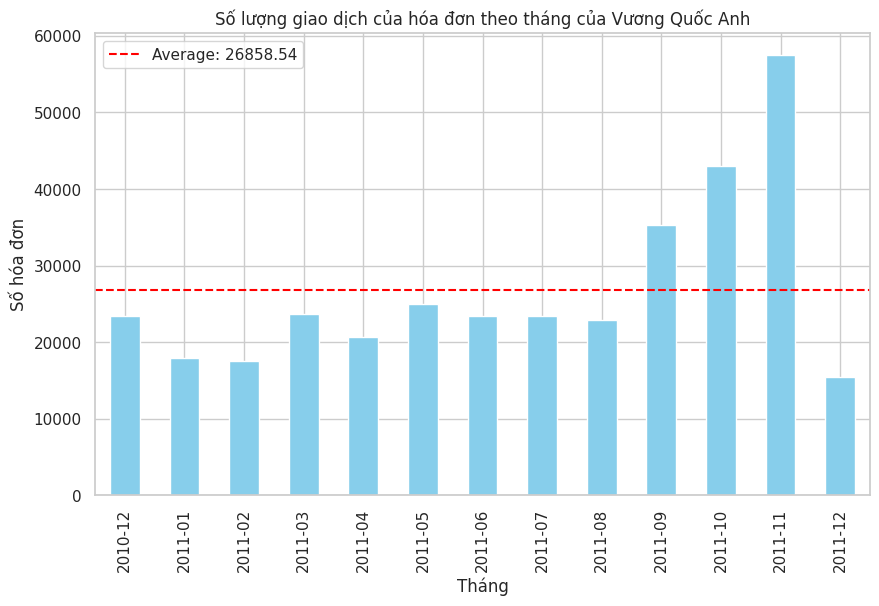

In [ ]:
monthly_invoice_counts = uk_data.groupby('YearMonth').size()
average_invoices_per_month = monthly_invoice_counts.mean()

plt.figure(figsize=(10, 6))
monthly_invoice_counts.plot(kind='bar', color='skyblue')
plt.axhline(y=average_invoices_per_month, color='red', linestyle='--', label=f'Average: {average_invoices_per_month:.2f}')
plt.title('Số lượng giao dịch của hóa đơn theo tháng của Vương Quốc Anh')
plt.xlabel('Tháng')
plt.ylabel('Số hóa đơn')
plt.xticks(rotation=90)
plt.legend()
plt.show()


5.2 Số lượng giao dịch của hóa đơn theo tháng của các quốc gia khác ngoài Vương Quốc Anh thì sao?

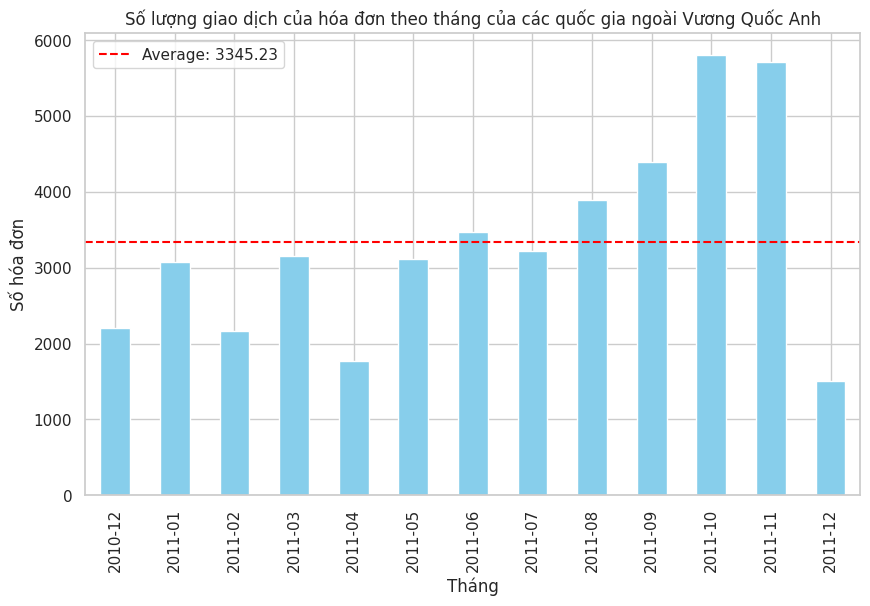

In [ ]:
monthly_invoice_counts = non_uk_data.groupby('YearMonth').size()
average_invoices_per_month = monthly_invoice_counts.mean()

plt.figure(figsize=(10, 6))
monthly_invoice_counts.plot(kind='bar', color='skyblue')
plt.axhline(y=average_invoices_per_month, color='red', linestyle='--', label=f'Average: {average_invoices_per_month:.2f}')
plt.title('Số lượng giao dịch của hóa đơn theo tháng của các quốc gia ngoài Vương Quốc Anh')
plt.xlabel('Tháng')
plt.ylabel('Số hóa đơn')
plt.xticks(rotation=90)
plt.legend()
plt.show()



Ba biểu đồ thể hiện sự phân bố số lượng giao dịch hóa đơn theo tháng cho toàn bộ dữ liệu, riêng Vương Quốc Anh, và các quốc gia khác.

**Toàn Bộ Dữ Liệu:**
- Có sự tăng đột biến rõ rệt vào tháng 11, có lẽ do mùa mua sắm cuối năm.
- Số lượng giao dịch trung bình hàng tháng khoảng 30203.77, với sự dao động qua các tháng.

**Vương Quốc Anh:**
- Tương tự như toàn bộ dữ liệu, tháng 11 cũng là tháng có số lượng giao dịch cao nhất.
- Số lượng giao dịch trung bình hàng tháng khoảng 26858.54, chiếm đa số trong tổng số giao dịch hàng tháng.

**Các Quốc Gia Khác:**
- Sự tăng trưởng không đột biến như ở Vương Quốc Anh, phản ánh sự đa dạng thị trường hơn.
- Số lượng giao dịch trung bình hàng tháng chỉ là 3345.23, chỉ bằng một phần nhỏ so với Vương Quốc Anh.

Nhìn chung, ba biểu đồ cho thấy Vương Quốc Anh là thị trường chủ đạo với số lượng giao dịch nổi trội, đặc biệt vào mùa mua sắm cuối năm. Các quốc gia khác có sự phân bố đều hơn và không thể hiện sự tăng vọt như thị trường Anh.


#### Câu 6. Mối quan hệ giữa Quantity và UnitPrice là gì?

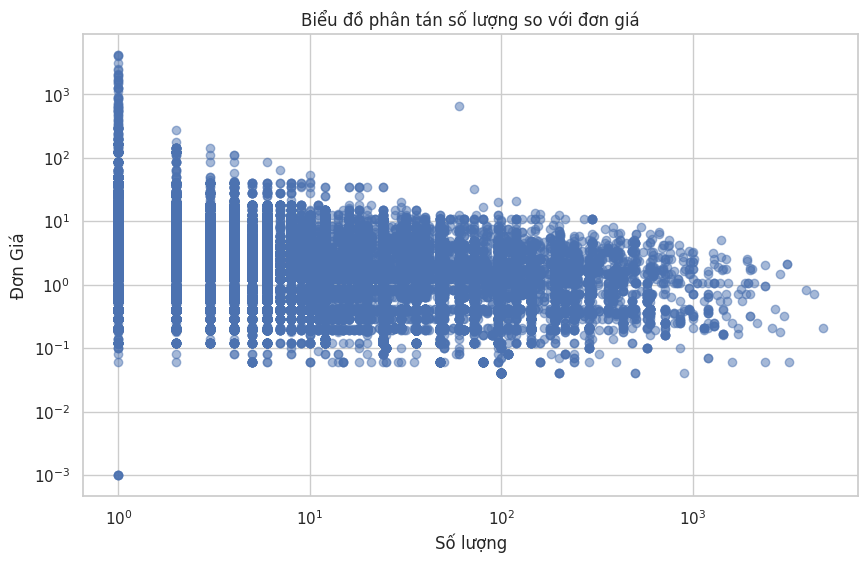

In [ ]:
filtered_data = new_data[(new_data['Quantity'] > 0) & (new_data['UnitPrice'] > 0)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Quantity'], filtered_data['UnitPrice'], alpha=0.5)
plt.title('Biểu đồ phân tán số lượng so với đơn giá')
plt.xlabel('Số lượng')
plt.ylabel('Đơn Giá')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


*Biểu đồ phân tán này khám phá mối quan hệ giữa số lượng sản phẩm bán ra (`Quantity`) và giá bán lẻ của mỗi sản phẩm (`UnitPrice`).*

Dựa vào hình ảnh biểu đồ:
- **Phần lớn các giao dịch tập trung vào một khoảng số lượng và giá đơn vị nhất định**, điều này phản ánh mức giá và số lượng mua hàng thông thường trong các giao dịch. Có thể đây là các sản phẩm tiêu dùng phổ thông với mức giá và số lượng ổn định.
- **Các điểm dữ liệu phân bố rộng lớn** trên trục số lượng và giá đơn vị cho thấy sự đa dạng trong mức giá và số lượng sản phẩm được bán ra. Những điểm này có thể chỉ ra các chương trình khuyến mãi, bán buôn, hoặc các sản phẩm đặc biệt có giá cao hơn bình thường.
- **Các điểm ngoại lệ** có thể là những giao dịch không thường xuyên như việc mua hàng số lượng lớn hoặc những sản phẩm có giá đơn vị cao.



#### Câu 7. Có sự khác biệt về giá trung bình của sản phẩm giữa các quốc gia không?

<Figure size 1000x1600 with 0 Axes>

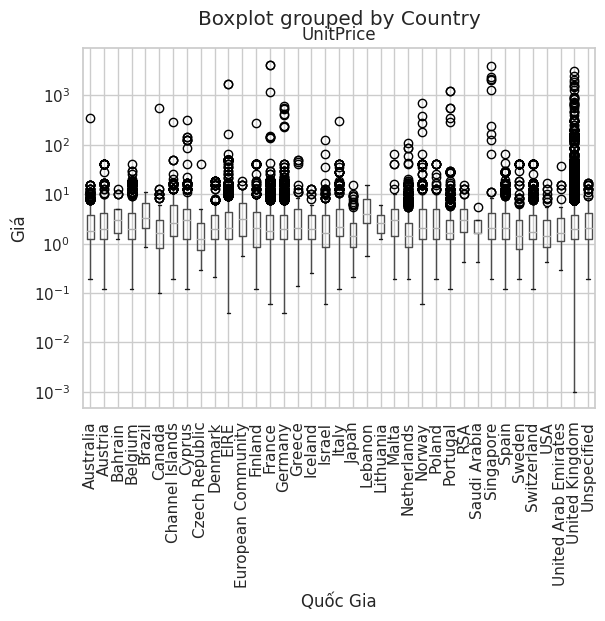

In [ ]:
filter_data = new_data[new_data['UnitPrice'] < new_data['UnitPrice'].quantile(0.99)]

plt.figure(figsize=(10, 16))
filtered_data.boxplot(column='UnitPrice', by='Country', rot=90)
plt.xlabel('Quốc Gia')
plt.ylabel('Giá')
plt.yscale('log')
plt.show()


*Biểu đồ boxplot này minh họa sự khác biệt về giá đơn vị (`UnitPrice`) giữa các quốc gia. Trục tung được hiển thị theo tỉ lệ logarit để dễ dàng quan sát các giá trị phân tán rộng.*

Cụ thể, ta có thể thấy:
- **Vương Quốc Anh** có mức giá trung vị thấp nhưng phạm vi giá  khá rộng, cho thấy sự đa dạng của giá sản phẩm ở thị trường này.
- **Đức và Pháp** có phân bố giá tương tự nhau với ít điểm ngoại lệ, điều này có thể chỉ ra rằng sản phẩm được bán ở hai thị trường này có giá cả khá ổn định.
- **Nhật Bản và Úc** có một số điểm ngoại lệ với giá rất cao, có thể liên quan đến sản phẩm đặc biệt hoặc các giao dịch lớn.
- Các quốc gia như **Hà Lan và Tây Ban Nha** hiện thị ít điểm ngoại lệ hơn, suy đoán rằng giá sản phẩm ít biến động hơn.

#### Câu 8. Số lượng sản phẩm bán ra có phụ thuộc vào thời gian trong ngày không?

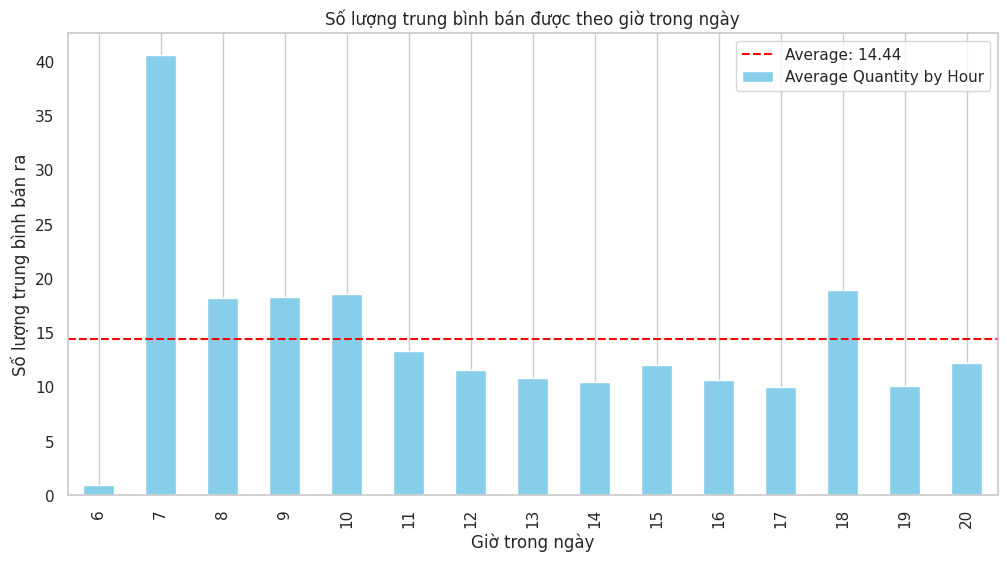

In [ ]:
average_quantity_by_hour = new_data.groupby('Hour')['Quantity'].mean()
overall_average_quantity = average_quantity_by_hour.mean()

plt.figure(figsize=(12, 6))
average_quantity_by_hour.plot(kind='bar', color='skyblue', label='Average Quantity by Hour')
plt.axhline(y=overall_average_quantity, color='red', linestyle='--',
            label=f'Average: {overall_average_quantity:.2f}')
plt.title('Số lượng trung bình bán được theo giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng trung bình bán ra')
plt.legend()
plt.grid(axis='y')
plt.show()

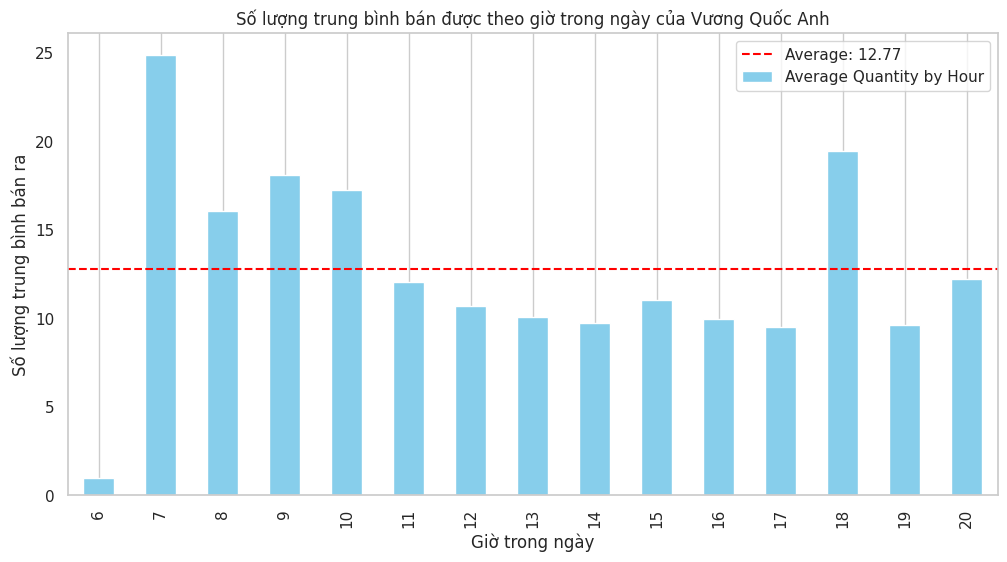

In [ ]:
average_quantity_by_hour = uk_data.groupby('Hour')['Quantity'].mean()
overall_average_quantity = average_quantity_by_hour.mean()

plt.figure(figsize=(12, 6))
average_quantity_by_hour.plot(kind='bar', color='skyblue', label='Average Quantity by Hour')
plt.axhline(y=overall_average_quantity, color='red', linestyle='--',
            label=f'Average: {overall_average_quantity:.2f}')
plt.title('Số lượng trung bình bán được theo giờ trong ngày của Vương Quốc Anh')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng trung bình bán ra')
plt.legend()
plt.grid(axis='y')
plt.show()


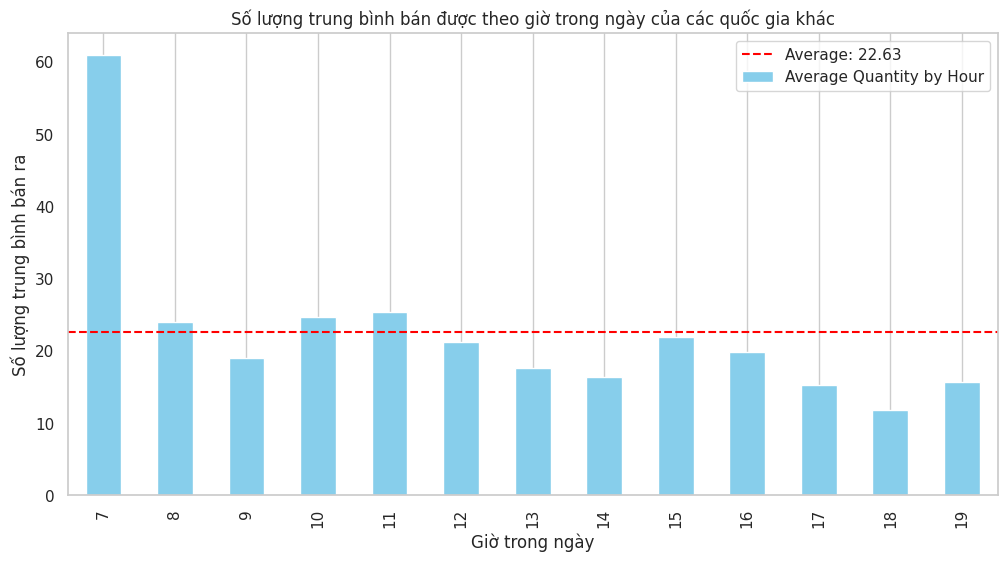

In [ ]:
average_quantity_by_hour = non_uk_data.groupby('Hour')['Quantity'].mean()
overall_average_quantity = average_quantity_by_hour.mean()

plt.figure(figsize=(12, 6))
average_quantity_by_hour.plot(kind='bar', color='skyblue', label='Average Quantity by Hour')
plt.axhline(y=overall_average_quantity, color='red', linestyle='--',
            label=f'Average: {overall_average_quantity:.2f}')
plt.title('Số lượng trung bình bán được theo giờ trong ngày của các quốc gia khác')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng trung bình bán ra')
plt.legend()
plt.grid(axis='y')
plt.show()



- **Toàn bộ dữ liệu**:
  - Có một sự tăng vọt số lượng sản phẩm bán ra vào đầu ngày, với đỉnh điểm vào giờ thứ 6 sáng.
  - Số lượng trung bình bán ra giảm dần sau đỉnh điểm và sau đó ổn định qua các giờ còn lại của ngày.

- **Vương quốc Anh**:
  - Mặc dù cũng thể hiện sự tăng vào buổi sáng sớm, số lượng trung bình bán ra trong ngày tương đối ổn định hơn so với tổng thể, với sự biến động không lớn.

- **Các quốc gia khác**:
  - Một lần nữa, số lượng trung bình bán ra tăng mạnh vào đầu ngày, nhất là vào giờ thứ 7.
  - Sau đỉnh điểm, số lượng bán ra giảm mạnh và duy trì ở mức độ ổn định cho đến cuối ngày.

Những biểu đồ này cho thấy mức độ chênh lệch trong hành vi mua sắm giữa khách hàng ở Vương quốc Anh và các quốc gia khác. Đặc biệt, sự biến động lớn về số lượng trung bình bán ra trong giờ đầu ngày ở các quốc gia ngoài Vương quốc Anh có thể chỉ ra những đặc thù thị trường hoặc hành vi mua sắm cụ thể.


#### Câu 9. Doanh số bán hàng có xu hướng thay đổi theo các ngày trong tuần không?

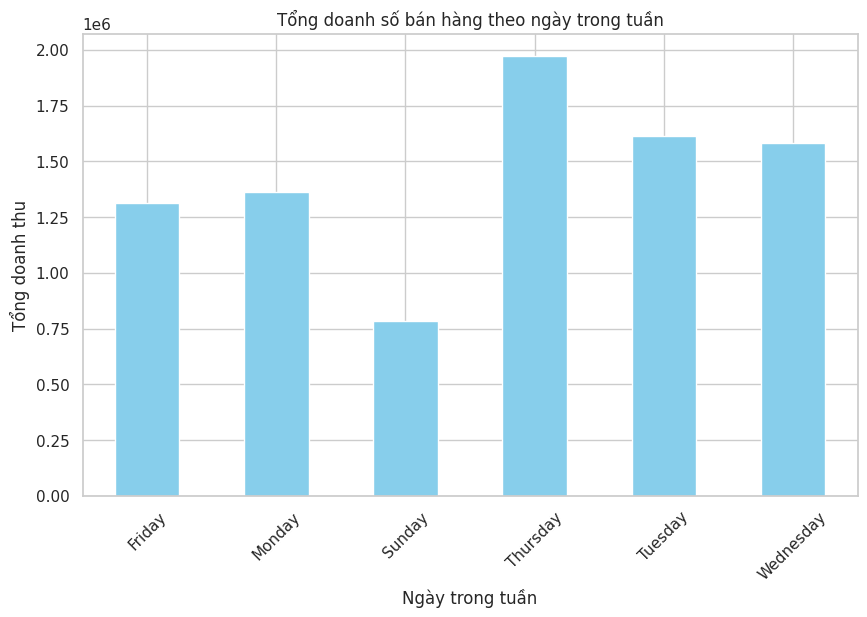

In [ ]:
sales_by_day_of_week = new_data.groupby('Day_of_week')['TotalPrice'].sum()

plt.figure(figsize=(10, 6))
sales_by_day_of_week.plot(kind='bar', color='skyblue')
plt.title('Tổng doanh số bán hàng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45)
plt.show()


In [ ]:
new_data['Day_of_week'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

*Biểu đồ này thể hiện doanh số bán hàng tổng cộng cho mỗi ngày trong tuần. Các cột biểu thị tổng doanh số đã đạt được trong mỗi ngày cụ thể.*

Nhận xét từ biểu đồ:
- **Thứ Năm** có doanh số cao nhất trong tuần, có thể cho thấy sự tăng cường hoạt động mua sắm hoặc các chương trình khuyến mãi đặc biệt vào giữa tuần.
- Ngược lại, **Chủ Nhật** lại có doanh số thấp nhất, điều này có thể phản ánh ngày nghỉ hoặc giờ làm việc giảm của cửa hàng.
- Các ngày còn lại trong tuần, bao gồm **Thứ Hai, Thứ Ba, Thứ Tư, và Thứ Sáu** đều có doanh số ổn định và không chênh lệch đáng kể so với nhau.
- **Thứ Bảy** không có trong biểu đồ gợi ý rằng có thể hiểu rằng không có hóa đơn nào được lập vào **Thứ Bảy**, có thể là cửa hàng không hoạt động vào **Thứ Bảy**.


#### Câu 10. Tổng doanh thu có liên quan đến số lượng sản phẩm bán ra trên mỗi hóa đơn không?

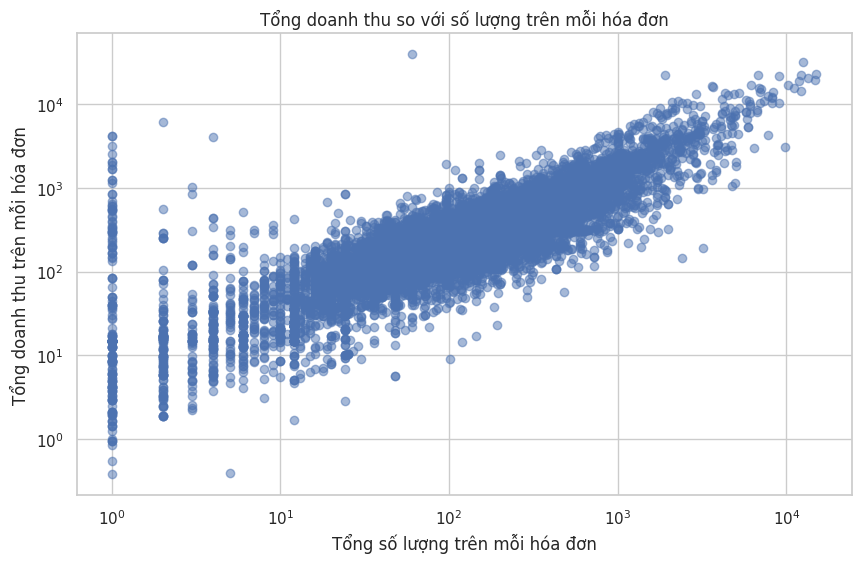

In [ ]:
invoice_totals = new_data.groupby('InvoiceNo').agg({'Quantity':'sum', 'TotalPrice':'sum'})

plt.figure(figsize=(10, 6))
plt.scatter(invoice_totals['Quantity'], invoice_totals['TotalPrice'], alpha=0.5)
plt.title('Tổng doanh thu so với số lượng trên mỗi hóa đơn')
plt.xlabel('Tổng số lượng trên mỗi hóa đơn')
plt.ylabel('Tổng doanh thu trên mỗi hóa đơn')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


*Biểu đồ phân tán này thể hiện mối quan hệ giữa tổng số lượng sản phẩm bán ra trên mỗi hóa đơn và tổng doanh số tương ứng. Điểm dữ liệu mỗi hóa đơn được biểu diễn theo trục hoành là tổng số lượng và trục tung là tổng doanh số.*

Phân tích từ biểu đồ:
- Có một **xu hướng tăng tổng doanh số với số lượng sản phẩm trên mỗi hóa đơn**, điều này phản ánh một mối quan hệ tỷ lệ thuận giữa số lượng sản phẩm và doanh số, một điều khá phổ biến trong bán hàng.
- Mặc dù có sự tăng trưởng, chúng ta cũng thấy sự **phân tán dữ liệu** tăng lên ở những hóa đơn có số lượng lớn, cho thấy sự biến động trong tổng doanh số có thể liên quan đến các yếu tố khác như loại sản phẩm, giá bán, hoặc giảm giá số lượng.
- Có một số **điểm dữ liệu ngoại lệ** với tổng doanh số cao so với tổng số lượng, có thể là do bán các sản phẩm có giá trị cao hoặc do những đơn hàng đặc biệt.

#### Câu 11. Các quốc gia khác nhau có mẫu hành vi mua hàng khác nhau qua các tháng không?

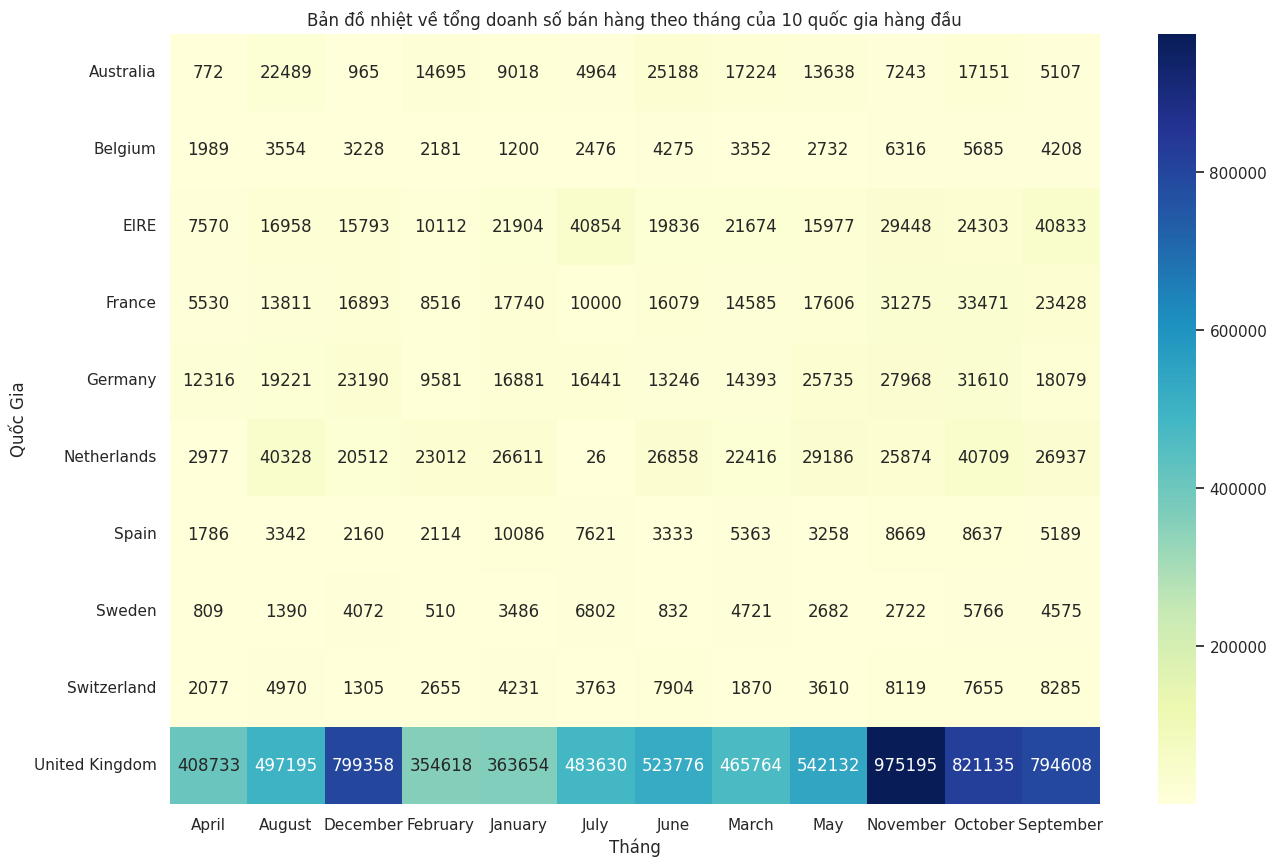

In [ ]:
top_countries_by_sales = new_data.groupby('Country')['TotalPrice'].sum().nlargest(10).index
top_countries_data = new_data[new_data['Country'].isin(top_countries_by_sales)]

pivot_table_top_countries = top_countries_data.pivot_table(
    values='TotalPrice',
    index='Country',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_top_countries, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Bản đồ nhiệt về tổng doanh số bán hàng theo tháng của 10 quốc gia hàng đầu')
plt.xlabel('Tháng')
plt.ylabel('Quốc Gia')
plt.show()


*Biểu đồ nhiệt trên thể hiện doanh số bán hàng tổng cộng theo từng tháng cho 10 quốc gia có doanh số cao nhất. Màu sắc càng nóng tức là doanh số càng cao, cho phép chúng ta nhận biết mẫu hành vi mua sắm qua các tháng trong năm.*

Phân tích từ biểu đồ:
- **Vương Quốc Anh** có doanh số vượt trội so với các quốc gia khác, đặc biệt vào các tháng cuối năm, phản ánh mùa mua sắm cho các kỳ nghỉ lễ.

10.1 Doanh số hàng tháng của Top 10 quốc gia ngoại trừ Vương quốc Anh ?

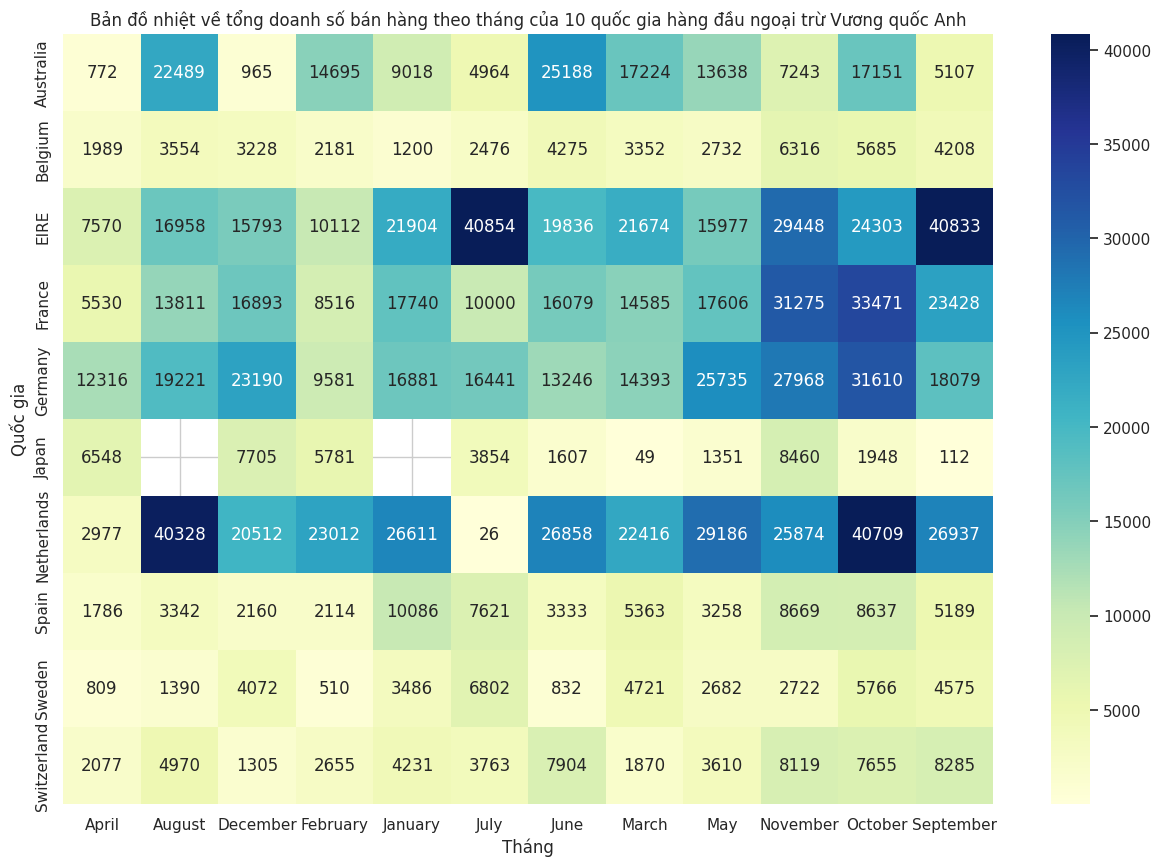

In [ ]:
top_countries_by_sales = non_uk_data.groupby('Country')['TotalPrice'].sum().nlargest(10).index
top_countries_data = non_uk_data[non_uk_data['Country'].isin(top_countries_by_sales)]

pivot_table_top_countries = top_countries_data.pivot_table(
    values='TotalPrice',
    index='Country',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_top_countries, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Bản đồ nhiệt về tổng doanh số bán hàng theo tháng của 10 quốc gia hàng đầu ngoại trừ Vương quốc Anh')
plt.xlabel('Tháng')
plt.ylabel('Quốc gia')
plt.show()


**Bản đồ nhiệt về tổng số bán hàng theo tháng của 10 quốc gia hàng đầu ngoại trừ Vương quốc Anh**

- Biểu đồ thể hiện sự thay đổi trong tổng doanh số bán hàng theo tháng từ mỗi quốc gia.
- Có vẻ như **EIRE** và **Netherlands** có tổng doanh số bán hàng cao vào các tháng cuối năm, đặc biệt là vào tháng 11 và 12.
- **EIRE** có doanh số bán hàng đột biến trong tháng 9, vượt trội hơn hẳn so với các tháng khác.
- Trái lại, **Australia** và **Japan** có tổng doanh số khá đồng đều qua các tháng.
- Các quốc gia như **France** và **Germany** cũng thể hiện sự gia tăng trong doanh số bán hàng vào mùa hè, nhất là từ tháng 6 đến tháng 8.
- Ngoài ra, màu sắc trong biểu đồ phản ánh tổng số bán hàng: các sắc thái màu xanh đậm chỉ ra doanh số cao trong khi màu xanh nhạt chỉ số thấp hơn.
- Việc biểu đồ không có màu đậm đồng nhất cho mỗi quốc gia cho thấy không có xu hướng chung rõ ràng giữa các tháng đối với mỗi quốc gia, mà thay vào đó, mỗi thị trường có những đặc thù riêng biệt.

Biểu đồ này cung cấp một cái nhìn tổng quan về cách thức và thời điểm mua sắm của khách hàng tại mỗi quốc gia, giúp nhận diện được các mùa cao điểm cũng như những kỳ vọng doanh số khác nhau qua các tháng trong năm.


#### Câu 12. Thời gian trong ngày có ảnh hưởng như thế nào đến Quantity và TotalPrice?

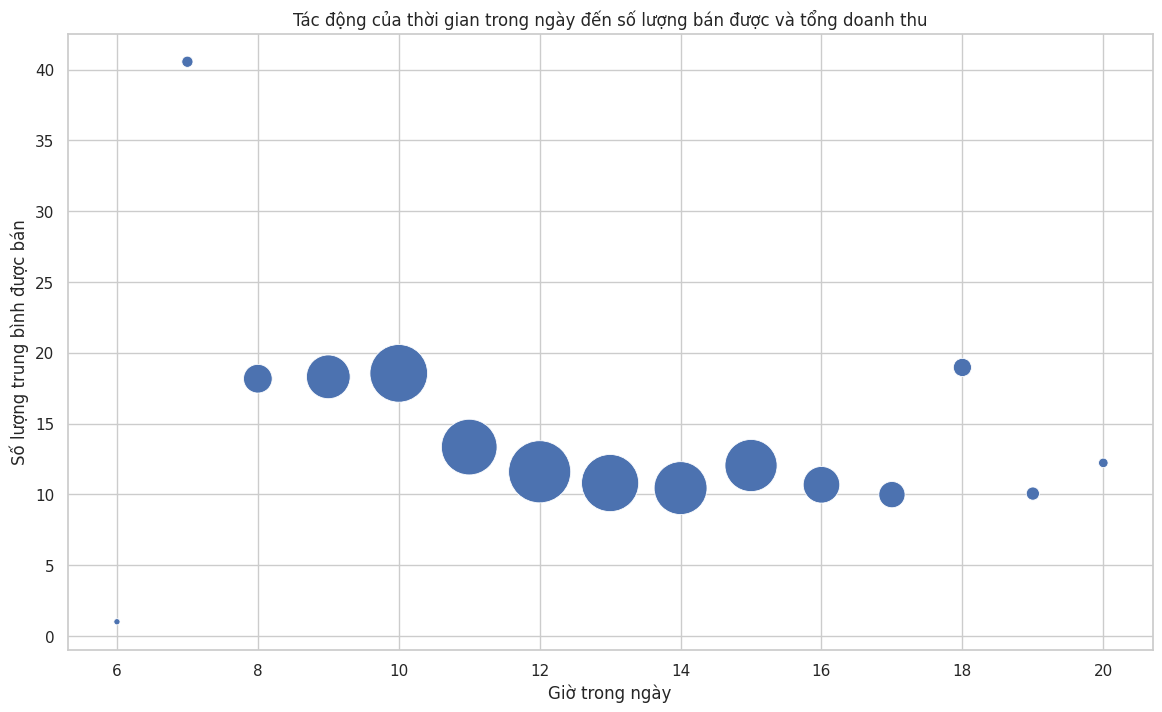

In [ ]:
hourly_summary = new_data.groupby('Hour').agg({
    'Quantity': 'mean',
    'TotalPrice': 'sum'
}).reset_index()

plt.figure(figsize=(14, 8))
sns.scatterplot(data=hourly_summary, x='Hour', y='Quantity', size='TotalPrice', legend=False, sizes=(20, 2000))
plt.title('Tác động của thời gian trong ngày đến số lượng bán được và tổng doanh thu')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng trung bình được bán')
plt.grid(True)
plt.show()



*Biểu đồ bubble chart này mô tả mối liên hệ giữa thời gian trong ngày với số lượng sản phẩm bán được và tổng giá trị bán hàng. Kích thước của mỗi bong bóng biểu thị tổng doanh thu tại mỗi giờ cụ thể, trong khi vị trí dọc trục tung cho thấy số lượng sản phẩm bán ra trung bình.*

Phân tích chi tiết từ biểu đồ:

- Số lượng bán ra trung bình **tăng đáng kể vào giữa ngày**, khoảng từ 10 giờ sáng đến 2 giờ chiều, điều này có thể cho thấy nhu cầu mua sắm của khách hàng tập trung vào khoảng thời gian này.
- Tuy nhiên, tổng doanh thu (biểu thị bởi kích thước bong bóng) **không tăng đồng bộ với số lượng bán ra**. Điều này có thể chỉ ra rằng mặc dù số lượng sản phẩm bán ra cao, giá trị từng sản phẩm lại thấp, hoặc các đơn hàng có giá trị nhỏ chiếm ưu thế.
- **Vào cuối ngày**, từ 4 giờ chiều đến 8 giờ tối, cả số lượng và tổng doanh thu có xu hướng giảm, phản ánh thói quen mua sắm giảm bớt sau giờ làm việc.
- **Điểm ngoại lệ vào lúc 6 giờ sáng** với số lượng bán ra cao nhất trong ngày có thể là do các đơn hàng được đặt trực tuyến từ đêm hôm trước và được xử lý ngay khi cửa hàng mở cửa.



#### Câu 13. Số lượng sản phẩm bán ra có liên quan đến các mùa khác nhau trong năm không?

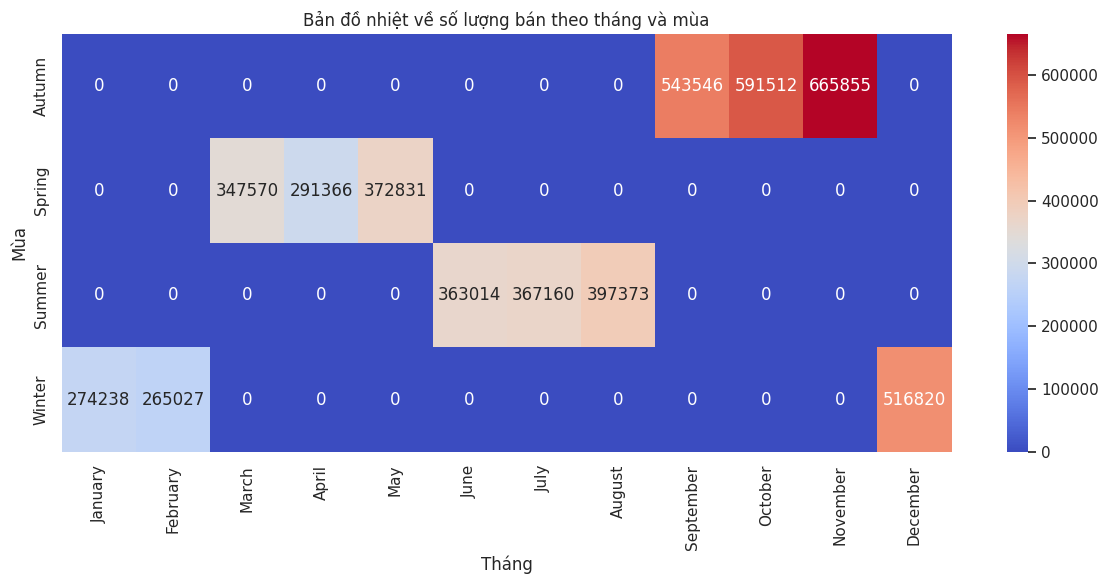

In [ ]:
def month_to_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Autumn'
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
new_data['Month'] = pd.Categorical(new_data['Month'], categories=months_order, ordered=True)
new_data.sort_values('Month', inplace=True)

new_data['Season'] = new_data['Month'].apply(month_to_season)
pivot_table = pd.pivot_table(new_data, values='Quantity', index=['Season'], columns='Month', aggfunc=np.sum, fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm")
plt.title('Bản đồ nhiệt về số lượng bán theo tháng và mùa')
plt.xlabel('Tháng')
plt.ylabel('Mùa')
plt.tight_layout()
plt.show()



*Biểu đồ nhiệt này thể hiện số lượng sản phẩm bán ra được phân loại theo từng tháng và mùa. Màu sắc càng nóng (đỏ) cho thấy số lượng bán ra càng cao, trong khi màu sắc lạnh hơn (xanh) biểu thị số lượng ít hơn.*

Nhận xét từ biểu đồ:
- Sự gia tăng số lượng sản phẩm bán ra rõ rệt vào **mùa thu**, đặc biệt là vào tháng 10 và 11, có thể do mùa mua sắm cho các kỳ nghỉ cuối năm.
- **Mùa đông** cũng chứng kiến số lượng bán ra đáng kể, với tháng 12 có số lượng cao nhất, điều này phản ánh mùa Giáng Sinh và nhu cầu mua quà tặng.
- Trong khi đó, **mùa xuân và mùa hè** có số lượng bán ra thấp hơn, có thể là do ít các dịp lễ hoặc khuyến mãi.
- **Mùa hè** có sự ổn định hơn về số lượng bán ra qua các tháng, có lẽ do nhu cầu tiêu dùng đều đặn trong mùa nghỉ mát.


In [ ]:
num_invoices = new_data.index.nunique()
num_invoices

18527

In [ ]:
num_unique_products = new_data['Quantity'].sum()
num_unique_products

4996312

#### Câu 14.	Số lượng đơn hàng trung bình trên mỗi khách hàng là bao nhiêu?

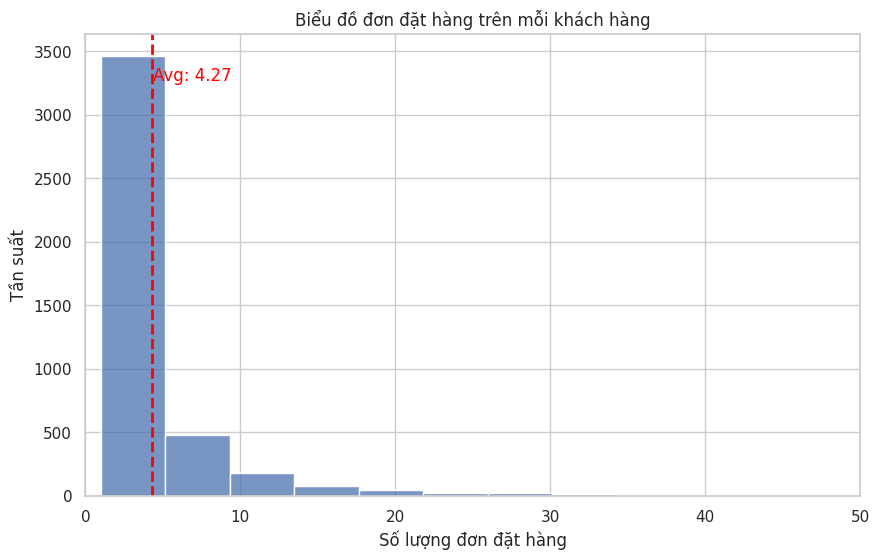

In [ ]:
new_data_reset = new_data.reset_index()
orders_per_customer = new_data_reset.groupby('CustomerID')['InvoiceNo'].nunique()

average_orders_per_customer = orders_per_customer.mean()

plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, kde=False, bins=50)
plt.axvline(average_orders_per_customer, color='red', linestyle='dashed', linewidth=2)
plt.text(average_orders_per_customer + 0.1, plt.ylim()[1]*0.9, f'Avg: {average_orders_per_customer:.2f}', color='red')
plt.title('Biểu đồ đơn đặt hàng trên mỗi khách hàng')
plt.xlabel('Số lượng đơn đặt hàng')
plt.ylabel('Tần suất')

plt.xlim(0, 50)

plt.show()



Biểu đồ histogram cho thấy:

- **Phần lớn khách hàng đặt dưới 10 đơn hàng.** Điều này phản ánh hành vi mua hàng thường xuyên của đại đa số khách hàng.
- **Số khách hàng đặt số lượng đơn hàng lớn hơn là ít.** Các trường hợp này có thể là khách hàng mua sắm sỉ hoặc những người mua hàng thường xuyên hơn.
- **Giá trị trung bình (khoảng 4.27), được chỉ ra bằng đường đứt màu đỏ,** cao hơn so với số đơn hàng mà phần lớn khách hàng đặt, điều này chỉ ra rằng có những khách hàng với số lượng đơn hàng cực kỳ cao ảnh hưởng đến giá trị trung bình này.
- **Sự chênh lệch giữa giá trị trung bình và mode (giá trị xuất hiện nhiều nhất)** cho thấy sự phân phối không đều trong hành vi đặt hàng của khách hàng.



#### Câu 15. Doanh thu bán hàng theo tháng có xu hướng như thế nào?

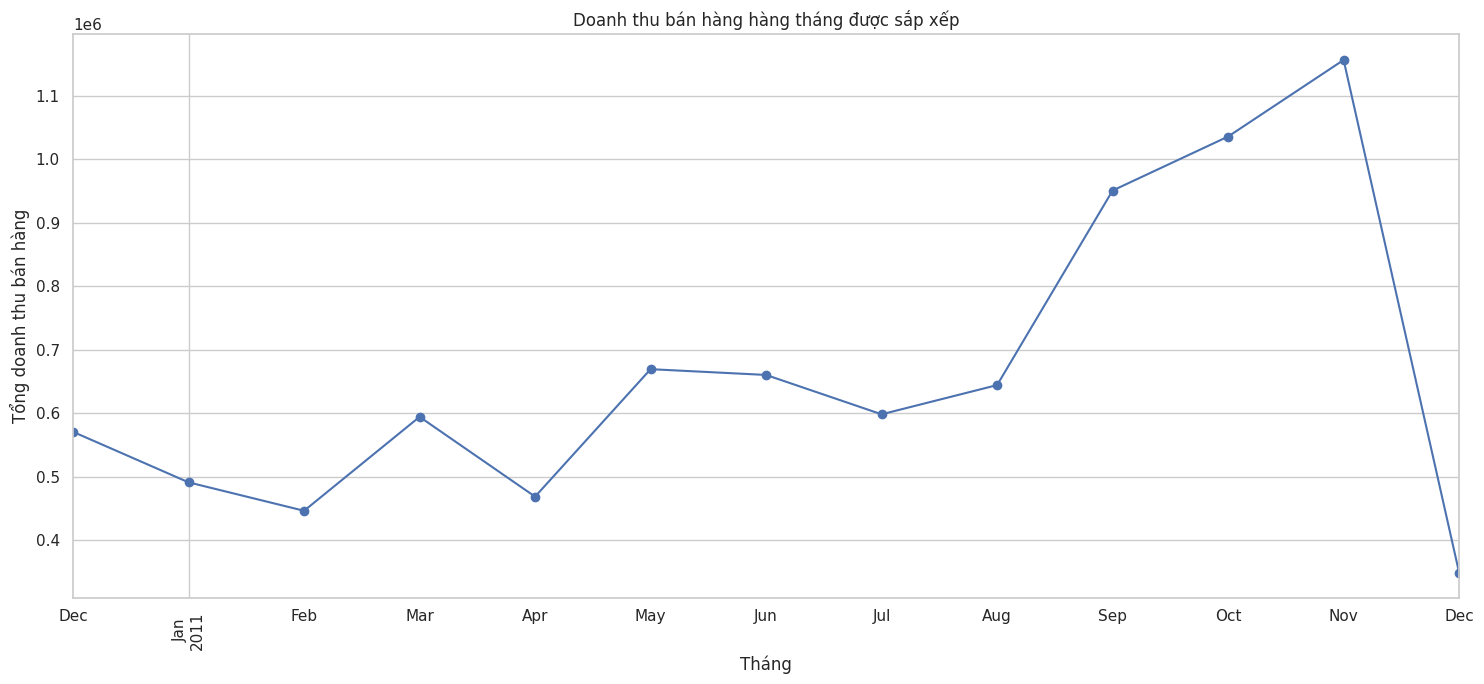

In [ ]:
new_data_sorted = new_data.sort_values(by='YearMonth')

monthly_sales = new_data_sorted.groupby('YearMonth')['TotalPrice'].sum()

plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Doanh thu bán hàng hàng tháng được sắp xếp')
plt.xlabel('Tháng')
plt.ylabel('Tổng doanh thu bán hàng')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Biểu đồ này trình bày tổng doanh thu bán hàng hàng tháng trong năm. Dưới đây là một số điểm quan trọng:
- Có thể thấy một xu hướng tăng trưởng mạnh mẽ vào cuối năm, với doanh thu tăng vọt vào tháng 11, điều này có thể giải thích do mùa mua sắm nghỉ lễ.
- Tuy nhiên, một sự sụt giảm đột ngột được quan sát thấy trong tháng 12, có thể do dữ liệu không đầy đủ hoặc các giao dịch chưa được xử lý hoàn tất.
- Các tháng mùa hè như tháng 6, 7 và 8 có doanh thu ổn định và không thấy biến động lớn.
- Nhìn chung, biểu đồ cho thấy một sự biến động theo mùa trong doanh số bán hàng, với sự tăng cường rõ ràng vào cuối năm.


#### Câu 16. Doanh số của các ngày trong tuần với các ngày cuối tuần chênh lệch nhau như thế nào ?

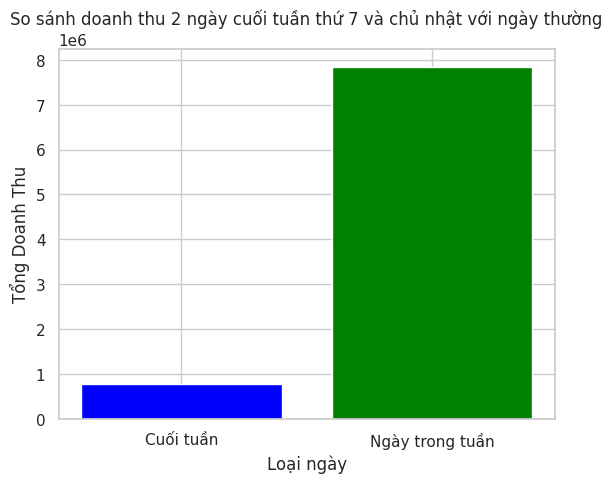

In [ ]:
weekend_revenue = new_data[new_data['IsWeekend']]['TotalPrice'].sum()
weekday_revenue = new_data[~new_data['IsWeekend']]['TotalPrice'].sum()

labels = ['Cuối tuần', 'Ngày trong tuần']
revenues = [weekend_revenue, weekday_revenue]

plt.bar(labels, revenues, color=['blue', 'green'])
plt.xlabel('Loại ngày')
plt.ylabel('Tổng Doanh Thu')
plt.title('So sánh doanh thu 2 ngày cuối tuần thứ 7 và chủ nhật với ngày thường')
plt.show()


#### Câu 17. Số lượng các sản phẩm được bán vào mỗi ngày trong tuần như thế nào?

In [ ]:
total_quantity_by_day = new_data.groupby('Day_of_week')['Quantity'].sum()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
total_quantity_by_day = total_quantity_by_day.reindex(ordered_days)
total_quantity_by_day_df = total_quantity_by_day.astype(float).to_frame()

total_quantity_by_day_df.index.name = 'Day_of_week'
total_quantity_by_day_df.reset_index(inplace=True)
total_quantity_by_day_df.set_index('Day_of_week', inplace=True)
total_quantity_by_day_df

,Quantity
Day_of_week,
Monday,766595.0
Tuesday,931544.0
Wednesday,959967.0
Thursday,1149583.0
Friday,727643.0
Saturday,NaN
Sunday,460980.0


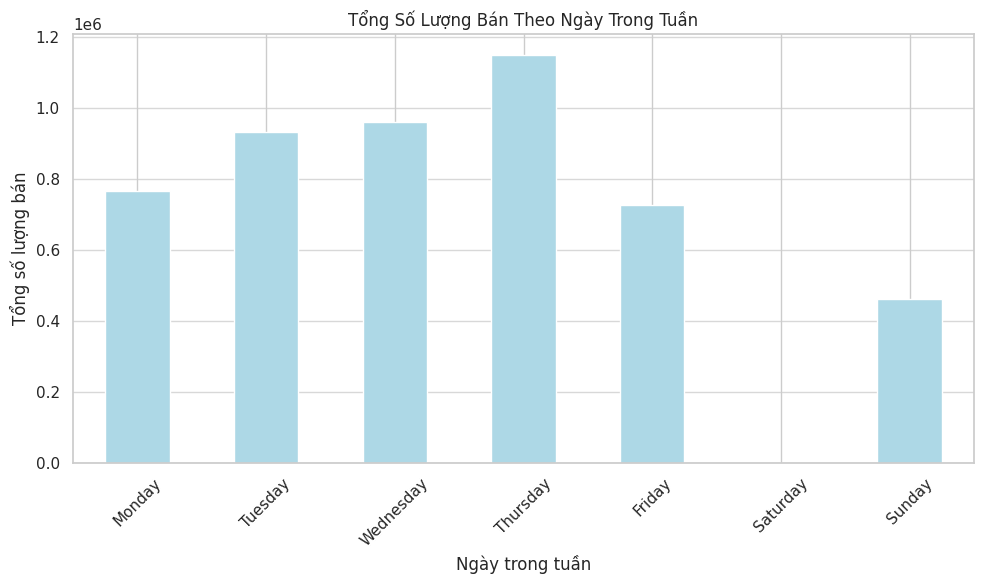

In [ ]:
plt.figure(figsize=(10, 6))
total_quantity_by_day_df['Quantity'].plot(kind='bar', color='lightblue')

plt.title('Tổng Số Lượng Bán Theo Ngày Trong Tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Tổng số lượng bán')
plt.xticks(rotation=45)

plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

#### Câu 18. Mất bao nhiêu lâu để khách hàng quay lại?

In [ ]:
customer_purchase_dates = new_data.groupby('CustomerID').agg(
    First_Purchase=('InvoiceDate', 'min'),
    Last_Purchase=('InvoiceDate', 'max')
).reset_index()

customer_purchase_dates['Return_Duration'] = (customer_purchase_dates['Last_Purchase'] - customer_purchase_dates['First_Purchase']).dt.days
customer_purchase_dates

,CustomerID,First_Purchase,Last_Purchase,Return_Duration
0,12347,2010-12-07 14:57:00,2011-12-07 15:52:00,365
1,12348,2010-12-16 19:09:00,2011-09-25 13:13:00,282
2,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0
3,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,0
4,12352,2011-02-16 12:33:00,2011-11-03 14:37:00,260
...,...,...,...,...
4332,18280,2011-03-07 09:52:00,2011-03-07 09:52:00,0
4333,18281,2011-06-12 10:53:00,2011-06-12 10:53:00,0
4334,18282,2011-08-05 13:35:00,2011-12-02 11:43:00,118
4335,18283,2011-01-06 14:14:00,2011-12-06 12:02:00,333


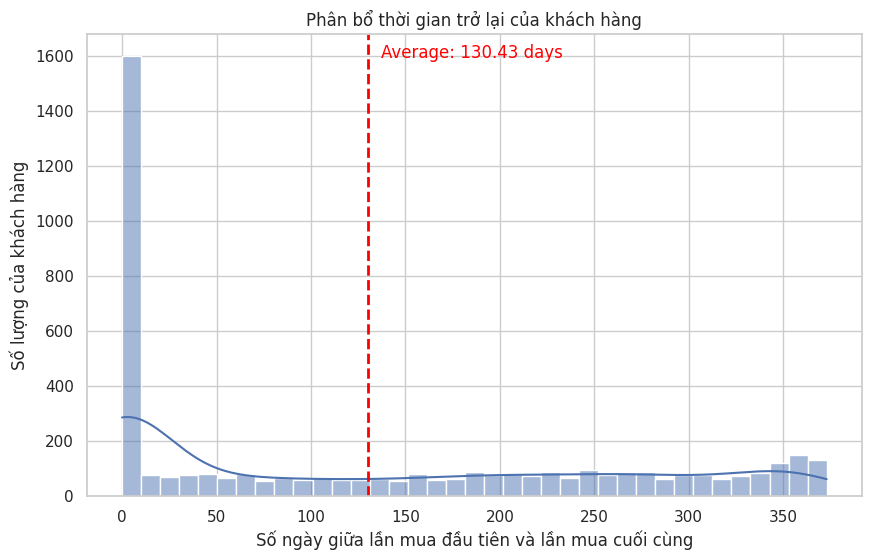

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_dates['Return_Duration'], kde=True, binwidth=10)
plt.title('Phân bổ thời gian trở lại của khách hàng')
plt.xlabel('Số ngày giữa lần mua đầu tiên và lần mua cuối cùng')
plt.ylabel('Số lượng của khách hàng')
plt.axvline(customer_purchase_dates['Return_Duration'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(customer_purchase_dates['Return_Duration'].mean()*1.05, plt.ylim()[1]*0.95, f'Average: {customer_purchase_dates["Return_Duration"].mean():.2f} days', color='red')
plt.show()


Biểu đồ trên thể hiện phân bố thời gian giữa lần mua đầu tiên và lần mua cuối cùng của khách hàng trong khoảng thời gian được quan sát. Dữ liệu được biểu diễn qua một histogram với trục x là số ngày và trục y là số lượng khách hàng.

Nhận xét từ biểu đồ:
- **Phần lớn khách hàng**: Có vẻ như đa số khách hàng mua hàng lại trong khoảng dưới 50 ngày kể từ lần mua đầu tiên của họ.
- **Trung bình**: Đường nét đứt màu đỏ chỉ trung bình số ngày trở lại là 130.43 ngày, cho thấy trong trung bình, khách hàng có thể quay trở lại sau khoảng 4 tháng.
- **Tần suất giảm dần**: Tần suất khách hàng quay trở lại giảm dần khi khoảng cách thời gian tăng lên, điều này có thể ám chỉ việc giữ chân khách hàng trở nên khó khăn hơn theo thời gian.
- **Cải thiện khách hàng quay lại**: Cần xem xét các chiến lược marketing và chăm sóc khách hàng để cải thiện tần suất mua hàng trở lại của khách hàng.


18.1 Tỷ lệ quay lại của khách hàng là bao nhiêu?

In [ ]:
total_customers = customer_purchase_dates['CustomerID'].nunique()
returning_customers = customer_purchase_dates[customer_purchase_dates['Return_Duration'] > 0]['CustomerID'].nunique()
return_rate = (returning_customers / total_customers) * 100

print(f"Tỷ lệ quay lại của khách hàng là: {return_rate:.2f}%")


Tỷ lệ quay lại của khách hàng là: 64.15%


In [ ]:
customer_countries = new_data_reset.groupby('CustomerID')['Country'].first().reset_index()
customer_purchase_dates_with_country = pd.merge(customer_purchase_dates, customer_countries, on='CustomerID')
customer_purchase_dates_with_country

,CustomerID,First_Purchase,Last_Purchase,Return_Duration,Country
0,12347,2010-12-07 14:57:00,2011-12-07 15:52:00,365,Iceland
1,12348,2010-12-16 19:09:00,2011-09-25 13:13:00,282,Finland
2,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0,Italy
3,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,0,Norway
4,12352,2011-02-16 12:33:00,2011-11-03 14:37:00,260,Norway
...,...,...,...,...,...
4332,18280,2011-03-07 09:52:00,2011-03-07 09:52:00,0,United Kingdom
4333,18281,2011-06-12 10:53:00,2011-06-12 10:53:00,0,United Kingdom
4334,18282,2011-08-05 13:35:00,2011-12-02 11:43:00,118,United Kingdom
4335,18283,2011-01-06 14:14:00,2011-12-06 12:02:00,333,United Kingdom


#### Câu 19. Quốc gia nào có số lượng khách hàng quay lại nhiều nhất?

In [ ]:
customer_purchase_dates_with_country['Returned'] = customer_purchase_dates_with_country['Return_Duration'] > 0
returning_customers_by_country = customer_purchase_dates_with_country.groupby('Country')['Returned'].sum().sort_values(ascending=False)

returning_customers_by_country

Country
United Kingdom          2515
Germany                   67
France                    59
Belgium                   18
Spain                     18
Switzerland               13
Portugal                  12
Australia                  8
Finland                    7
Channel Islands            6
Norway                     6
Netherlands                5
Japan                      5
Austria                    5
Italy                      5
Denmark                    5
Sweden                     4
Poland                     4
Cyprus                     3
Unspecified                3
EIRE                       3
Greece                     1
USA                        1
Malta                      1
Czech Republic             1
European Community         1
Iceland                    1
Lithuania                  1
Singapore                  1
Canada                     1
Israel                     1
United Arab Emirates       1
Bahrain                    0
Lebanon                    0
Brazil

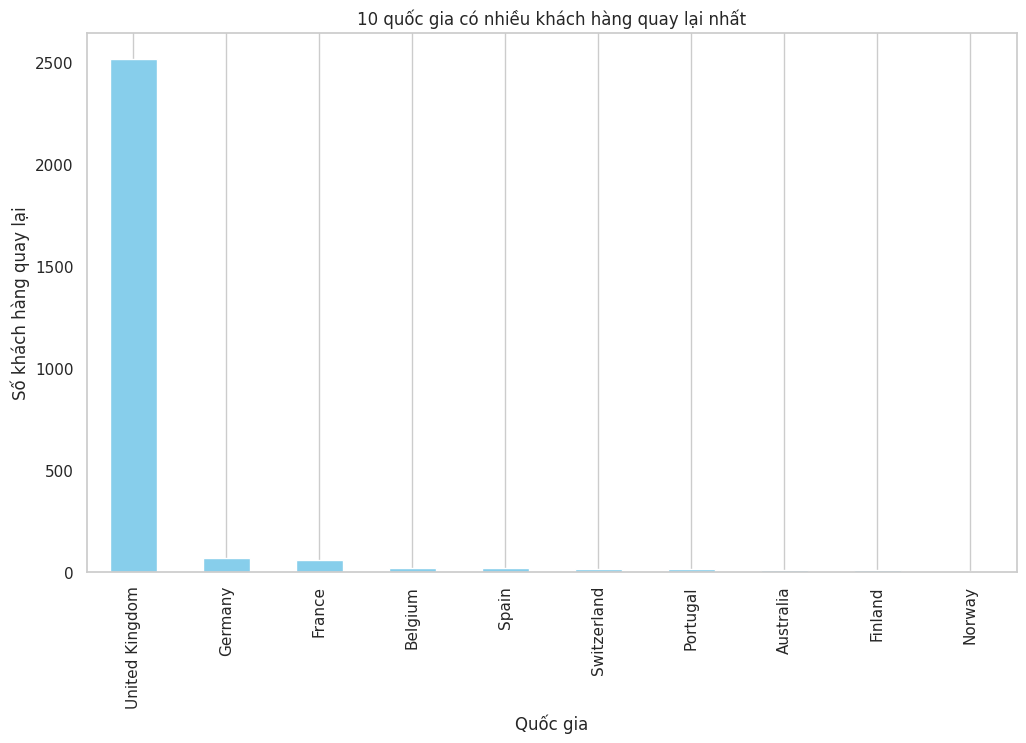

In [ ]:
top_countries = returning_customers_by_country.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
top_countries.plot(kind='bar', color='skyblue')
plt.title('10 quốc gia có nhiều khách hàng quay lại nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Số khách hàng quay lại')
plt.grid(axis='y')
plt.show()

#### Câu 20. Sự biến động doanh thu hằng ngài có gì đặc biệt không?

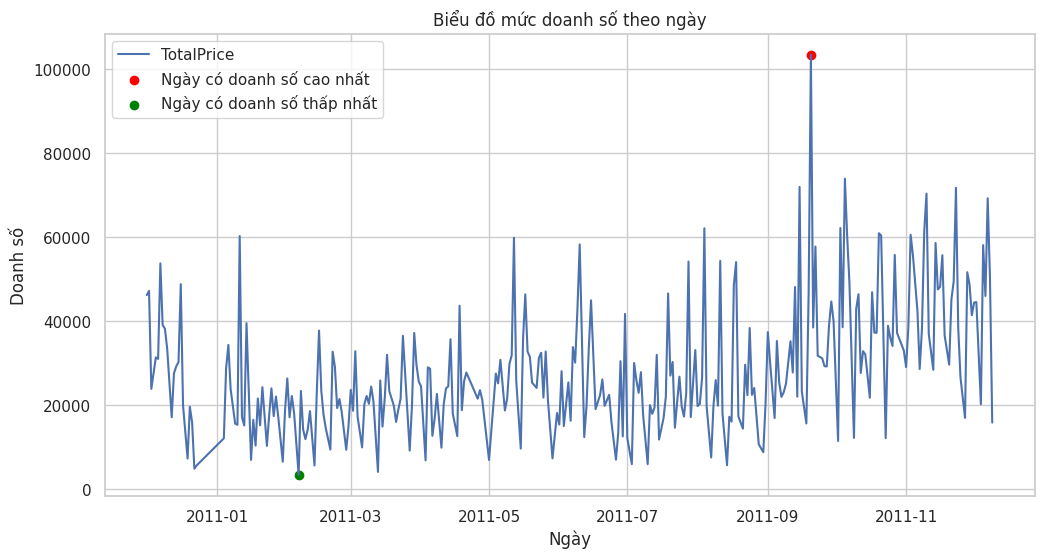

In [ ]:
daily_sales = new_data.groupby(new_data['InvoiceDate'].dt.date)['TotalPrice'].sum()
max_sales_day = daily_sales.idxmax()
max_sales_amount = daily_sales[max_sales_day]
min_sales_day = daily_sales.idxmin()
min_sales_amount = daily_sales[min_sales_day]


plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.scatter(max_sales_day, max_sales_amount, color='red', label='Ngày có doanh số cao nhất')
plt.scatter(min_sales_day, min_sales_amount, color='green', label='Ngày có doanh số thấp nhất')
plt.title('Biểu đồ mức doanh số theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Doanh số')
plt.legend()
plt.grid(True)
plt.show()

Biểu đồ chuỗi thời gian này mô tả sự biến động của doanh thu bán hàng hàng ngày. Có một số quan sát đáng chú ý:

- **Dòng màu xanh** thể hiện doanh thu tổng cộng hàng ngày, cho thấy sự biến động lớn, điều này cho thấy hiệu suất bán hàng hàng ngày không ổn định.
- Một **chấm đỏ** chỉ ra ngày có doanh số cao nhất, có thể gợi ý về một sự kiện đặc biệt, đợt giảm giá, hoặc yếu tố mùa vụ đã thúc đẩy một đỉnh điểm trong việc mua sắm.
- Ngược lại, **chấm xanh lá cây** đại diện cho ngày có doanh số thấp nhất, gợi ý về những yếu tố bên ngoài có thể đã tác động tiêu cực đến doanh số bán hàng trong ngày đó.
- Sự biến động tổng thể của đồ thị đường chỉ ra tính chất không thường xuyên của doanh số hàng ngày, có thể được ảnh hưởng bởi hành vi mua sắm của khách hàng, xu hướng thị trường, mức độ tồn kho, hoặc các hoạt động kinh doanh cụ thể.

Biểu đồ này là một công cụ chiến lược để xác định xu hướng bán hàng và có thể cung cấp thông tin hữu ích cho việc lập kế hoạch tồn kho, chiến lược tiếp thị và dự báo doanh số. Việc hiểu rõ nguyên nhân đằng sau sự cao điểm và thấp điểm trong doanh số có thể cung cấp những hiểu biết quý giá cho việc lập kế hoạch kinh doanh và điều chỉnh hoạt động trong tương lai.


#### Câu 21. Các quốc gia có số lượng sản phẩm bán được theo tháng cao nhất là tháng nào và số lượng bao nhiêu ?

In [ ]:
country_monthly_sales = new_data.groupby(['Country', 'Month'])['Quantity'].sum().reset_index()
country_max_sales = country_monthly_sales.loc[country_monthly_sales.groupby('Country')['Quantity'].idxmax()]
country_max_sales_sorted = country_max_sales.sort_values('Quantity', ascending=False)
print(country_max_sales_sorted)

                  Country      Month  Quantity
430        United Kingdom   November    568099
283           Netherlands     August     29300
128                  EIRE  September     22033
177               Germany    October     17731
166                France   November     17353
5               Australia       June     15981
231                 Japan      April      8058
381                Sweden    October      6151
299                Norway   December      5901
393           Switzerland    October      4532
369                 Spain    October      4352
45                Belgium    October      3170
321              Portugal    October      3143
211                Israel     August      3028
146               Finland      March      2536
85                 Cyprus   February      2191
354             Singapore       July      2160
74        Channel Islands      March      2104
226                 Italy   November      2063
405                   USA    October      1717
116          

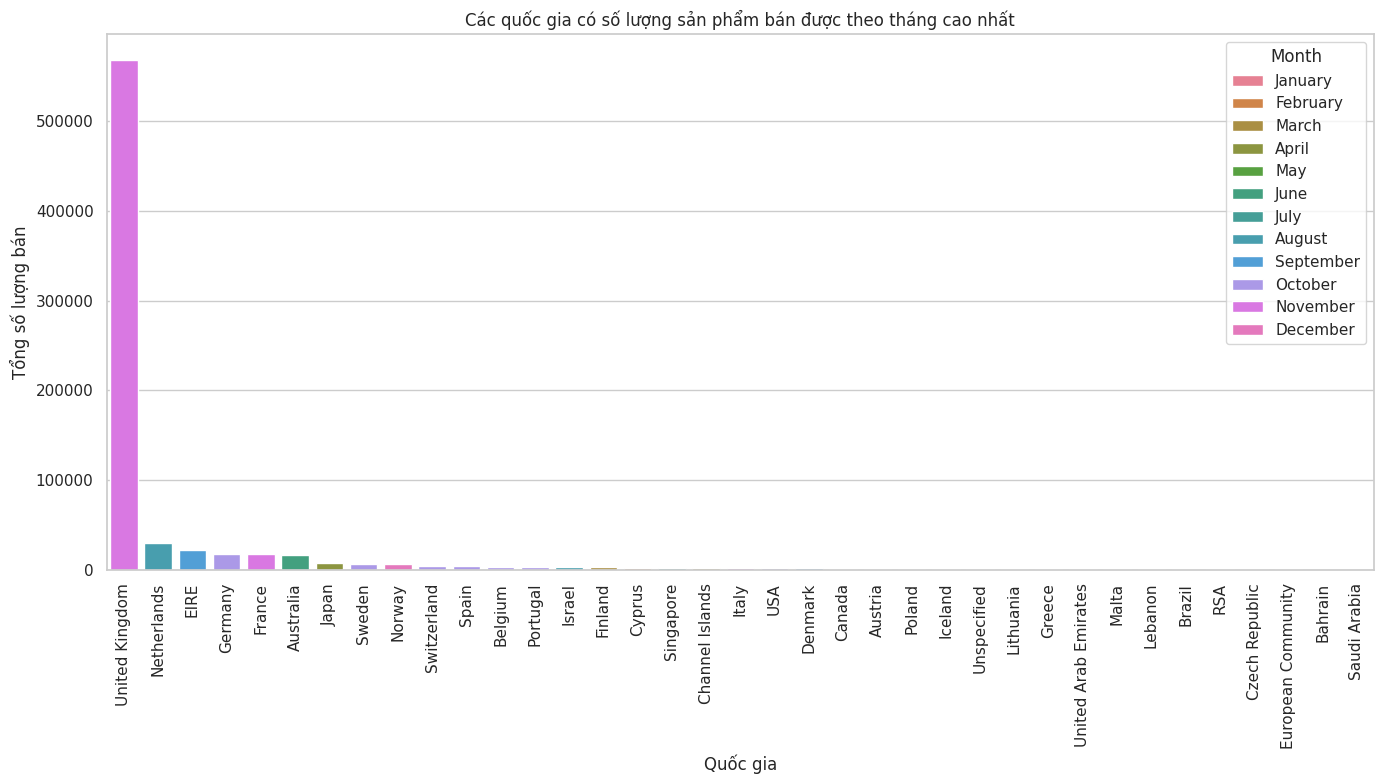

In [ ]:

plt.figure(figsize=(14, 8))
sns.barplot(data=country_max_sales_sorted, x='Country', y='Quantity', hue='Month', dodge=False)
plt.title('Các quốc gia có số lượng sản phẩm bán được theo tháng cao nhất')
plt.xticks(rotation=90)
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số lượng bán')
plt.legend(title='Month')
plt.tight_layout()
plt.show()


Biểu đồ cột ngang này thể hiện tổng số lượng sản phẩm được bán ra từ các quốc gia trong các tháng khác nhau. Một số nhận xét cụ thể có thể bao gồm:

- Vương quốc Anh (United Kingdom) dẫn đầu với số lượng sản phẩm bán ra áp đảo so với các quốc gia khác, điều này phản ánh thị trường chính hoặc nguồn gốc của dữ liệu.
- Các quốc gia khác như Hà Lan (Netherlands), EIRE, và Đức (Germany) cũng có số lượng sản phẩm bán ra đáng kể, tuy nhiên vẫn nhỏ bé so với Vương quốc Anh.
- Màu sắc của các cột biểu thị tháng mà mỗi quốc gia có doanh số bán hàng cao nhất, cung cấp cái nhìn toàn cảnh về xu hướng theo mùa và thị trường địa phương.
- Biểu đồ cũng chỉ ra rằng không phải tất cả các quốc gia đều có doanh số đỉnh điểm vào cùng một thời điểm, điều này có thể cho thấy sự khác biệt về văn hóa mua sắm, lễ hội, hoặc các sự kiện mùa vụ.

Từ những thông tin này, doanh nghiệp có thể điều chỉnh chiến lược kinh doanh và marketing để phù hợp với từng thị trường cụ thể, nhắm đến việc tối ưu hóa doanh số vào những tháng mà mỗi quốc gia có nhu cầu mua sắm cao nhất.


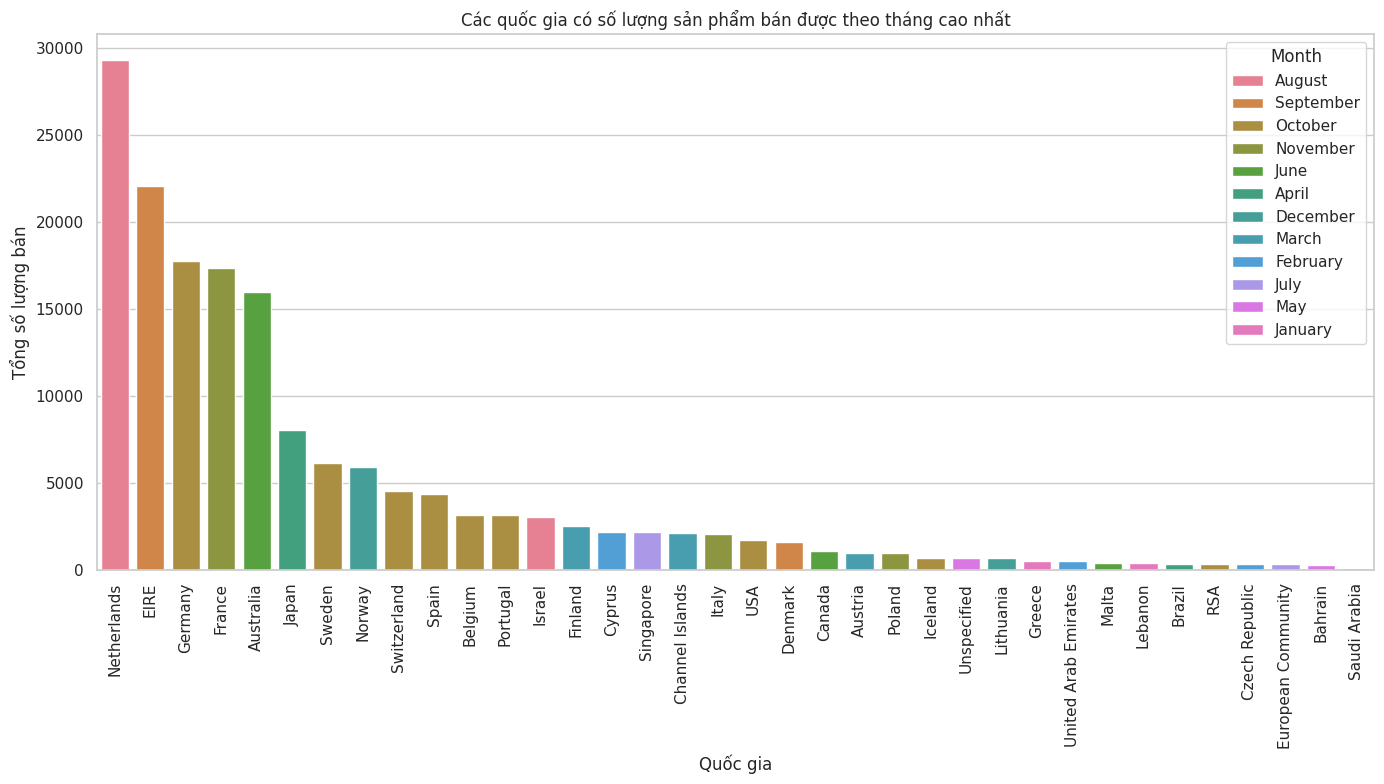

In [ ]:
country_monthly_sales = non_uk_data.groupby(['Country', 'Month'])['Quantity'].sum().reset_index()
country_max_sales = country_monthly_sales.loc[country_monthly_sales.groupby('Country')['Quantity'].idxmax()]
country_max_sales_sorted = country_max_sales.sort_values('Quantity', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(data=country_max_sales_sorted, x='Country', y='Quantity', hue='Month', dodge=False)
plt.title('Các quốc gia có số lượng sản phẩm bán được theo tháng cao nhất')
plt.xticks(rotation=90)
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số lượng bán')
plt.legend(title='Month')
plt.tight_layout()
plt.show()


Biểu đồ cột này thể hiện tổng số lượng sản phẩm bán được theo tháng của mỗi quốc gia. Một số điểm nổi bật có thể được nhận xét như sau:

- Hà Lan (Netherlands) dẫn đầu với tổng số lượng sản phẩm bán ra cao nhất, theo sau là EIRE và Đức (Germany), cho thấy sự tập trung cao của hoạt động mua sắm tại các thị trường này.
- Các quốc gia khác như Pháp (France), Úc (Australia), và Nhật Bản (Japan) cũng góp mặt trong danh sách này với số lượng đáng kể.
- Màu sắc đại diện cho các tháng cho thấy tháng mà mỗi quốc gia đạt được doanh số cao nhất, cung cấp cái nhìn sâu sắc về mùa vụ và thói quen mua sắm theo từng tháng.
- Có vẻ như tháng 11 và tháng 12 (màu hồng và màu tím) là những tháng có doanh số cao nhất cho hầu hết các quốc gia, điều này có thể liên quan đến mua sắm mùa lễ hội cuối năm.

Phân tích này có thể giúp doanh nghiệp hiểu rõ hơn về mô hình mua sắm theo mùa của khách hàng ở từng quốc gia và điều chỉnh chiến lược kinh doanh cũng như dự trữ hàng hóa để đáp ứng nhu cầu theo mùa.


Do dữ liệu có đa số là các giao dịch là Vương quốc Anh nên đây sẽ là thị trường chính khai thác. Nên chúng em sẽ phân tích đào sâu vào thị trường này.

In [ ]:
uk_data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Year,Month,Day,Day_of_week,IsWeekend,Hour,Minute
InvoiceNo,,,,,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,December,1,Wednesday,False,8,26
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,December,1,Wednesday,False,8,26
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,December,1,Wednesday,False,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40,2011-12,2011,December,9,Friday,False,12,31
581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011-12,2011,December,9,Friday,False,12,49
581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00,2011-12,2011,December,9,Friday,False,12,49


#### Câu 22. Tổng số lượng sản phẩm bán theo tháng ở Anh là bao nhiêu?

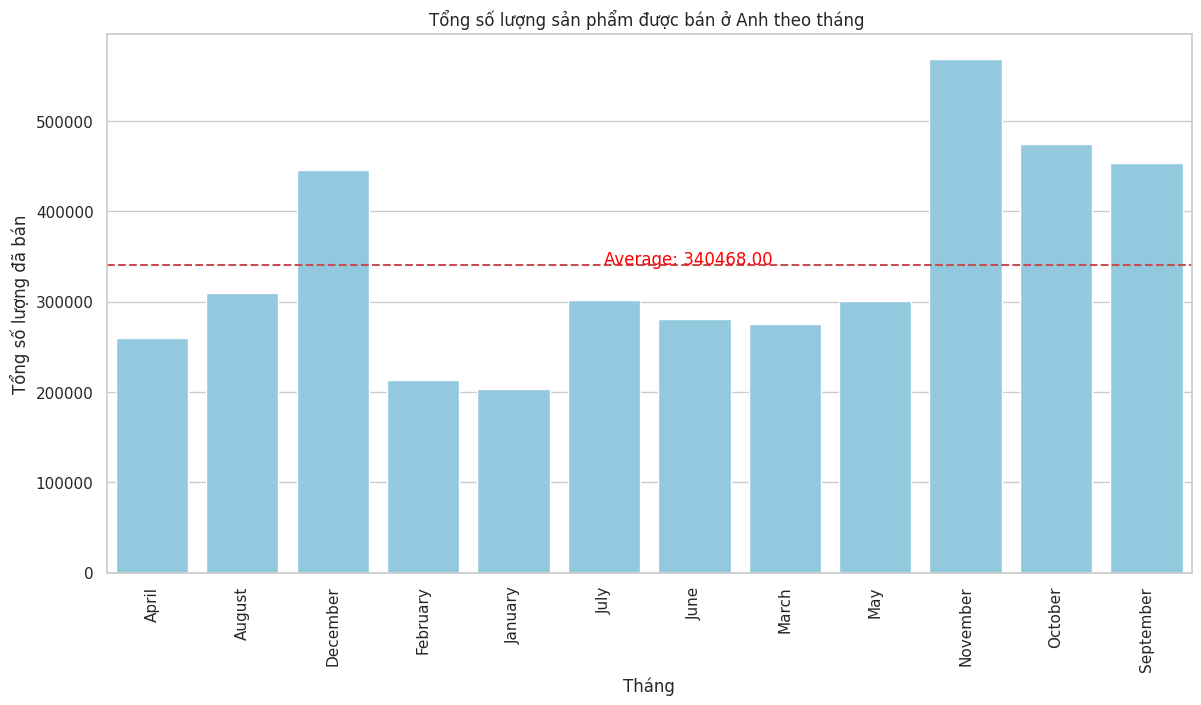

In [ ]:
uk_monthly_quantity = uk_data.groupby('Month')['Quantity'].sum().reset_index()
uk_monthly_quantity.sort_values('Month', inplace=True)
average_quantity = uk_monthly_quantity['Quantity'].mean()


plt.figure(figsize=(14, 7))
sns.barplot(data=uk_monthly_quantity, x='Month', y='Quantity', color='skyblue')
plt.axhline(y=average_quantity, color='r', linestyle='--')
plt.text(5, average_quantity + 300, f'Average: {average_quantity:.2f}', color='red')
plt.title('Tổng số lượng sản phẩm được bán ở Anh theo tháng ')
plt.xlabel('Tháng')
plt.ylabel('Tổng số lượng đã bán')
plt.xticks(rotation=90)
plt.show()

22.1 Doanh thu các sản phẩm theo tháng của nước Anh có xu hướng như thế nào ?

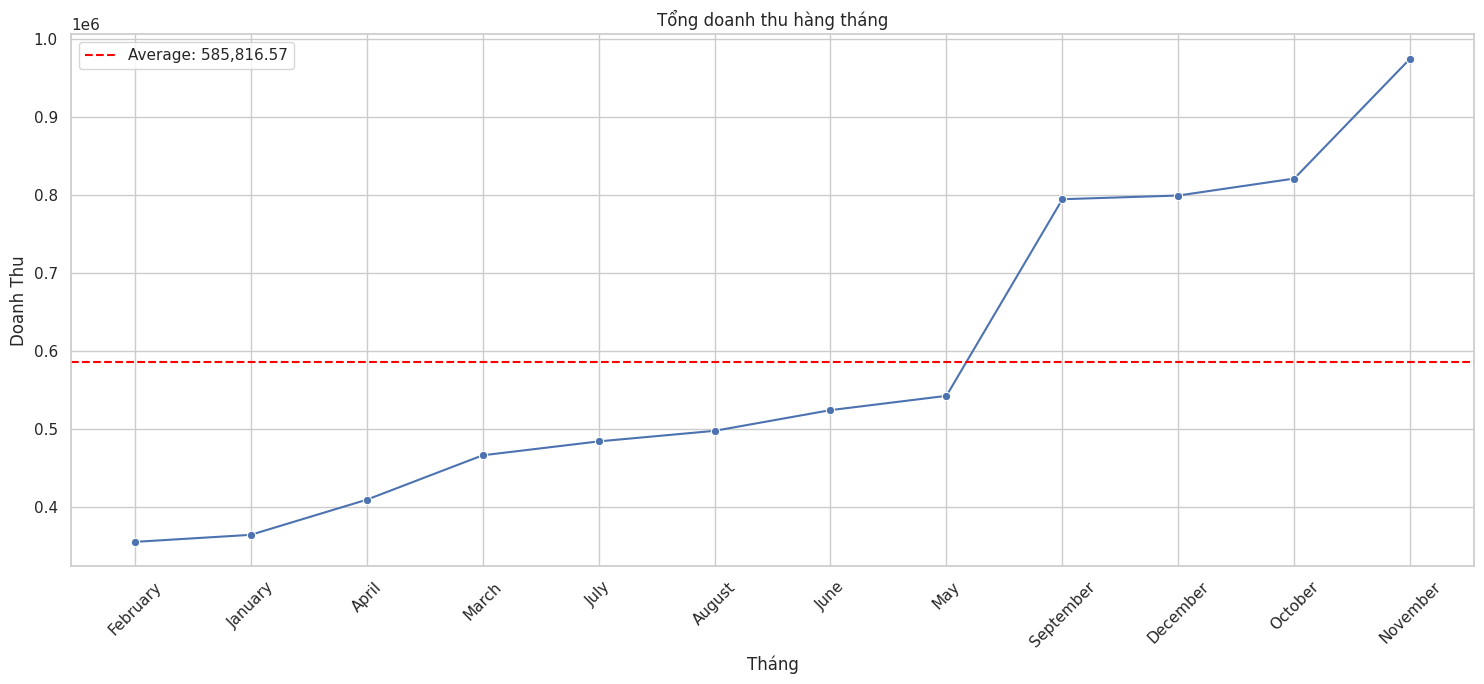

In [ ]:
monthly_revenue = uk_data.groupby('Month')['TotalPrice'].sum().sort_values().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_revenue, x='Month', y='TotalPrice', marker='o')
plt.title('Tổng doanh thu hàng tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh Thu')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

average_revenue = monthly_revenue['TotalPrice'].mean()
plt.axhline(y=average_revenue, color='red', linestyle='--', label=f'Average: {average_revenue:,.2f}')
plt.legend()


plt.show()


Qua 2 biểu đồ ta thấy **tháng 11** có thể gọi là tháng bùng nổ doanh số đói với Vương quốc Anh, vậy hãy xem điều gì đã xảy ra.

#### Câu 23. Top các sản phảm bán chạy nhất của Vương quốc Anh là những sản phẩm nào?

In [ ]:
uk_product_sales = uk_data.groupby('Description')['Quantity'].sum().reset_index()
top_selling_product = uk_product_sales.sort_values('Quantity', ascending=False).head(10)
top_selling_product

,Description,Quantity
3741,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
1736,JUMBO BAG RED RETROSPOT,41878
3654,WHITE HANGING HEART T-LIGHT HOLDER,34630
204,ASSORTED COLOUR BIRD ORNAMENT,32628
2561,POPCORN HOLDER,28919
2205,PACK OF 12 LONDON TISSUES,24321
526,BROCADE RING PURSE,22675
2239,PACK OF 72 RETROSPOT CAKE CASES,22442
3490,VICTORIAN GLASS HANGING T-LIGHT,21876
2237,PACK OF 60 PINK PAISLEY CAKE CASES,19959


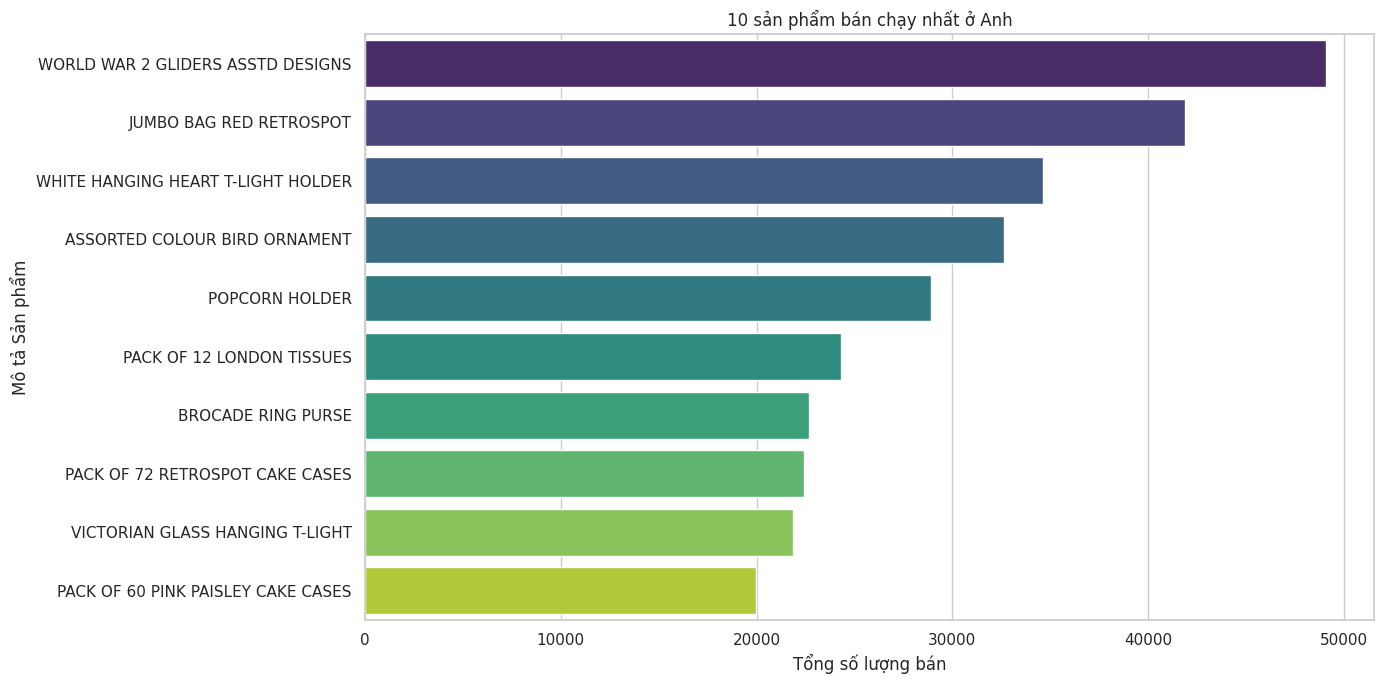

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(data=top_selling_product, x='Quantity', y='Description', palette="viridis")
plt.title('10 sản phẩm bán chạy nhất ở Anh')
plt.xlabel('Tổng số lượng bán')
plt.ylabel('Mô tả Sản phẩm')
plt.tight_layout()

plt.show()

In [ ]:
print(top_selling_product.sum().head(10))

Description    WORLD WAR 2 GLIDERS ASSTD DESIGNSJUMBO BAG RED...
Quantity                                                  298414
dtype: object


#### Câu 24. Các sản phẩm được bán trong tháng 11 là sản phẩm nào?

In [ ]:
november_uk_data = uk_data[uk_data['Month'] == 'November']
november_uk_products = november_uk_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()
november_uk_products

,Description,Quantity
0,POPCORN HOLDER,8028
1,RABBIT NIGHT LIGHT,6138
2,PAPER CHAIN KIT 50'S CHRISTMAS,5640
3,JUMBO BAG RED RETROSPOT,5340
4,ASSORTED COLOUR BIRD ORNAMENT,4803
...,...,...
2689,MRS ROBOT SOFT TOY,1
2690,ASSORTED CAKES FRIDGE MAGNETS,1
2691,PARTY CONES CANDY ASSORTED,1
2692,WALL MIRROR RECTANGLE DIAMANTE PINK,1


In [ ]:
november_uk_products.head(10)

,Description,Quantity
0,POPCORN HOLDER,8028
1,RABBIT NIGHT LIGHT,6138
2,PAPER CHAIN KIT 50'S CHRISTMAS,5640
3,JUMBO BAG RED RETROSPOT,5340
4,ASSORTED COLOUR BIRD ORNAMENT,4803
5,WOODEN STAR CHRISTMAS SCANDINAVIAN,4431
6,WOODEN HEART CHRISTMAS SCANDINAVIAN,4297
7,DISCO BALL CHRISTMAS DECORATION,4199
8,WHITE HANGING HEART T-LIGHT HOLDER,4197
9,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4068


Bảng sau đây thể hiện số lượng bán ra của 10 sản phẩm hàng đầu.
* `POPCORN HOLDER` dẫn đầu với 8028 sản phẩm được bán ra, tiếp theo là `RABBIT NIGHT LIGHT` và `PAPER CHAIN KIT 50'S CHRISTMAS` với 6138 và 5640 sản phẩm tương ứng.
* Các sản phẩm khác như `JUMBO BAG RED RETROSPOT` và `ASSORTED COLOUR BIRD ORNAMENT` cũng có số lượng bán ra đáng kể, lần lượt là 5340 và 4803. Sản phẩm ít bán ra nhất trong top 10 là `WORLD WAR 2 GLIDERS ASSTD DESIGNS` với 4068 sản phẩm.
* Một điểm chung rõ ràng là các sản phẩm liên quan đến trang trí Giáng sinh như `WOODEN STAR CHRISTMAS SCANDINAVIAN`, `WOODEN HEART CHRISTMAS SCANDINAVIAN`, và `DISCO BALL CHRISTMAS DECORATION` đều nằm trong danh sách, cho thấy mùa Giáng sinh có ảnh hưởng lớn đến nhu cầu mua sắm.


#### Câu 25. Các sản phẩm nào được bán cao nhất của mỗi tháng?

In [ ]:
monthly_product_sales = uk_data.groupby(['Month', 'Description'])['Quantity', 'TotalPrice'].sum().reset_index()
best_selling_products_each_month = monthly_product_sales.loc[monthly_product_sales.groupby('Month')['Quantity'].idxmax()]
best_selling_products_each_month.sort_values('Month', inplace=True)

best_selling_products_each_month

,Month,Description,Quantity,TotalPrice
2145,April,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9552,2132.64
2328,August,ASSORTED COLOUR BIRD ORNAMENT,6361,9557.77
7538,December,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5830,1332.24
8198,February,EMPIRE DESIGN ROSETTE,3976,3290.42
11643,January,WHITE HANGING HEART T-LIGHT HOLDER,5169,14203.05
12557,July,GIRLS ALPHABET IRON ON PATCHES,3456,610.56
15066,June,JUMBO BAG RED RETROSPOT,3007,5629.66
17354,March,JUMBO BAG RED RETROSPOT,4713,8115.43
20435,May,SMALL POPCORN HOLDER,6610,4869.70
22501,November,POPCORN HOLDER,8028,6136.88


* Sản phẩm "WHITE HANGING HEART T-LIGHT HOLDER" bắt đầu năm mới với doanh thu cao nhất trong danh sách, đạt hơn 14,000 bảng Anh từ 5169 đơn vị bán ra trong tháng Giêng.

* Một số sản phẩm bán chạy xuất hiện nhiều lần trong danh sách, chẳng hạn như "JUMBO BAG RED RETROSPOT" và "WORLD WAR 2 GLIDERS ASSTD DESIGNS", điều này cho thấy chúng có độ phổ biến nhất định xuyên suốt năm.

* Mặc dù "WORLD WAR 2 GLIDERS ASSTD DESIGNS" không phải là sản phẩm đắt nhất, nhưng nó xuất hiện ba lần trong danh sách và có tổng doanh thu khá khiêm tốn so với số lượng bán ra, cho thấy mặt hàng này có giá bán lẻ thấp nhưng được tiêu thụ với số lượng lớn, có thể do giá rẻ và được yêu thích.

* Doanh thu không phải lúc nào cũng tỷ lệ thuận với số lượng sản phẩm bán ra, điều này phản ánh việc một số sản phẩm có giá bán cao hơn có thể tạo ra doanh thu lớn mặc dù số lượng bán ít hơn.

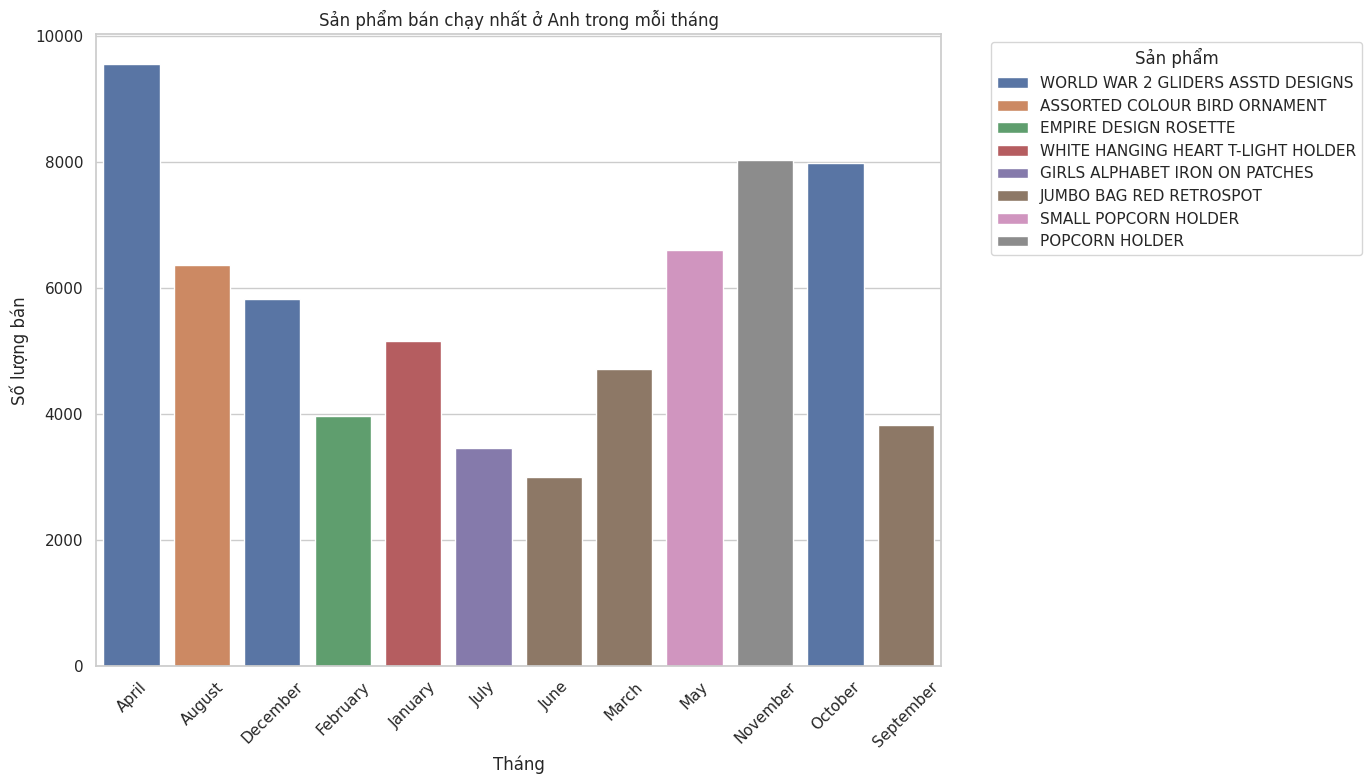

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=best_selling_products_each_month,
    x='Month',
    y='Quantity',
    hue='Description',
    dodge=False
)
plt.title('Sản phẩm bán chạy nhất ở Anh trong mỗi tháng')
plt.xticks(rotation=45)
plt.xlabel('Tháng')
plt.ylabel('Số lượng bán')
plt.legend(title='Sản phẩm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


* Biểu đồ cột mô tả sự thay đổi về số lượng sản phẩm bán được ở Anh qua các tháng, cho thấy rõ sự ảnh hưởng của yếu tố mùa vụ và ngày lễ đến hành vi tiêu dùng. Các sản phẩm như 'WHITE HANGING HEART T-LIGHT HOLDER' và 'POPCORN HOLDER' có số lượng bán ra cao trong những tháng cụ thể, tương ứng với những sự kiện như Valentine và Giáng Sinh, cho thấy nhu cầu mua sắm tăng cao trong những dịp lễ này.


#### Câu 26. Hành vi mua sắm của các khách hàng hàng đầu sẽ như thế nào?

In [ ]:
uk_data.reset_index(inplace=True)

In [ ]:
uk_customer_summary = uk_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'InvoiceNo': pd.Series.nunique
}).reset_index()

uk_customer_summary.rename(columns={'InvoiceNo': 'InvoiceCount'}, inplace=True)
uk_customer_summary_sorted = uk_customer_summary.sort_values(by='TotalPrice', ascending=False).reset_index(drop=True)
uk_customer_summary_sorted_sample=uk_customer_summary_sorted.head(10)
uk_customer_summary_sorted_sample

,CustomerID,Quantity,TotalPrice,InvoiceCount
0,18102,63924,258741.30,60
1,17450,69973,194390.79,46
2,17511,64549,91062.38,31
3,16029,40011,72530.49,62
4,16684,50255,66653.56,28
5,14096,16352,65164.79,17
6,13694,63312,65039.62,50
7,15311,38147,60632.75,91
8,13089,31025,58762.08,97
9,17949,30546,58510.48,45


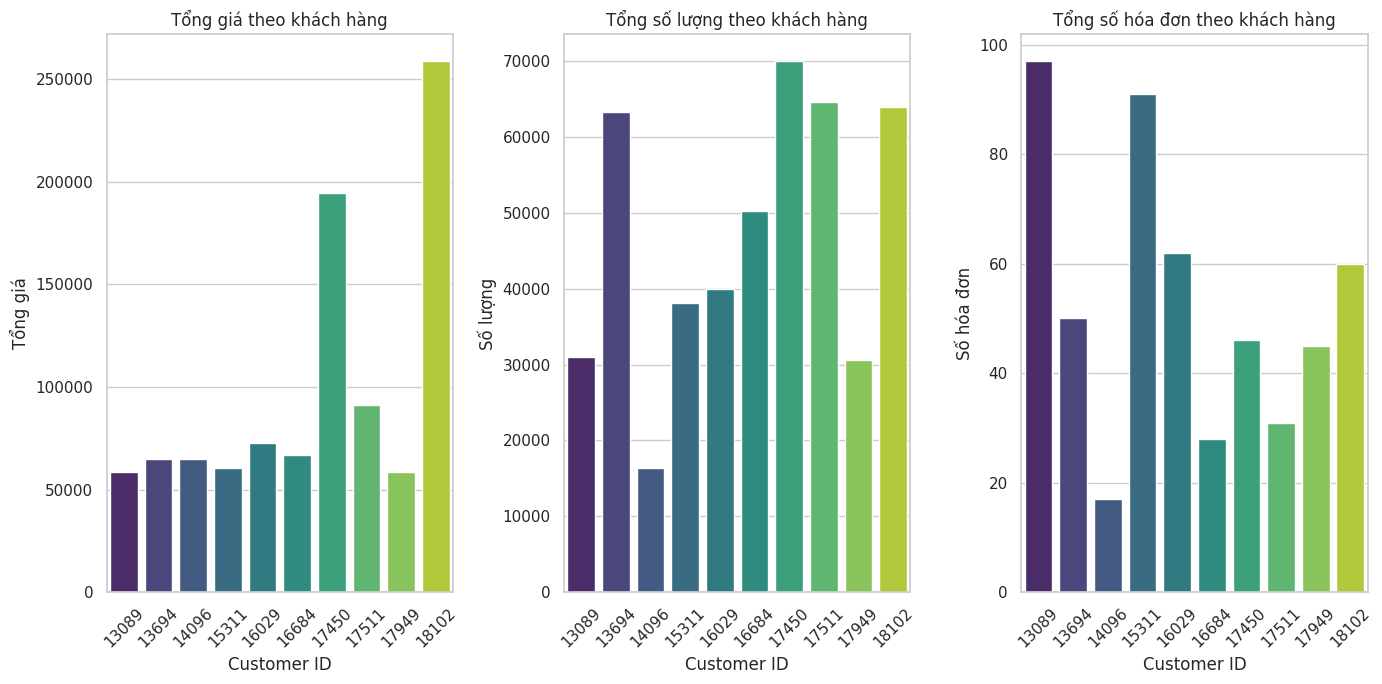

In [ ]:
plt.figure(figsize=(14, 7))

# TotalPrice
plt.subplot(1, 3, 1)
sns.barplot(x='CustomerID', y='TotalPrice', data=uk_customer_summary_sorted_sample, palette='viridis')
plt.title('Tổng giá theo khách hàng')
plt.xlabel('Customer ID')
plt.ylabel('Tổng giá')
plt.xticks(rotation=45)

# Quantity
plt.subplot(1, 3, 2)
sns.barplot(x='CustomerID', y='Quantity', data=uk_customer_summary_sorted_sample, palette='viridis')
plt.title('Tổng số lượng theo khách hàng')
plt.xlabel('Customer ID')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)

# InvoiceCount
plt.subplot(1, 3, 3)
sns.barplot(x='CustomerID', y='InvoiceCount', data=uk_customer_summary_sorted_sample, palette='viridis')
plt.title('Tổng số hóa đơn theo khách hàng')
plt.xlabel('Customer ID')
plt.ylabel('Số hóa đơn')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Biểu đồ trên cung cấp thông tin chi tiết về hành vi mua sắm của các khách hàng hàng đầu. Dưới đây là một số điểm chính:

- **Tổng giá trị chi tiêu:** Biểu đồ đầu tiên thể hiện rằng khách hàng với ID `18102` đã chi tiêu nhiều nhất, gấp nhiều lần so với các khách hàng khác. Điều này cho thấy khả năng họ mua hàng với số lượng lớn hoặc chọn các mặt hàng có giá trị cao.

- **Tổng số lượng sản phẩm:** Khách hàng `17450` dẫn đầu về số lượng sản phẩm mua, điều này không hoàn toàn tương xứng với tổng giá trị chi tiêu của họ, có thể họ mua các sản phẩm có giá thấp nhưng số lượng lớn.

- **Tổng số hóa đơn:** Khách hàng `13089` có số lượng hóa đơn cao nhất, cho thấy họ mua hàng thường xuyên nhưng mỗi lần mua có thể chỉ với số lượng ít.

Từ những số liệu trên, có thể đưa ra giả định rằng khách hàng `18102` và `17450` có thể là các đại lý bán buôn hoặc mua sắm với mục đích kinh doanh, trong khi khách hàng `13089` có thể là một người tiêu dùng cá nhân mua hàng đều đặn cho nhu cầu hàng ngày hoặc tuần.

Ngoài ra, việc sử dụng các màu sắc khác nhau cho mỗi cột giúp dễ dàng nhận biết và so sánh các chỉ số giữa các khách hàng. Điều này là hữu ích trong việc phân tích sâu hơn về mô hình mua sắm và ưu tiên phát triển chiến lược kinh doanh.

## Kết Luận

### Nhận xét:
**Theo Sản Phẩm:**

- Các sản phẩm có số lượng bán ra lớn như 'POPCORN HOLDER', 'RABBIT NIGHT LIGHT', và 'PAPER CHAIN KIT 50'S CHRISTMAS' chứng tỏ sự ưa chuộng của thị trường và nên được xem là các mặt hàng chủ lực.
- Có sự thay đổi về sản phẩm bán chạy theo mùa, điều này cần được nhìn nhận như là cơ hội cho việc tối ưu hóa tồn kho và chiến lược marketing mùa vụ.

**Theo Khách Hàng:**

- Số lượng giao dịch lớn từ các khách hàng cụ thể như khách hàng với ID 18102 và 17450 cho thấy sự trung thành cao đối với cửa hàng và tiềm năng cho các chương trình khách hàng thân thiết.
- Việc phân tích sâu hơn về hành vi và sở thích mua sắm của những khách hàng này có thể giúp cải thiện chiến lược marketing.

**Theo Thời Gian và Mùa:**

- Số lượng sản phẩm bán ra có sự biến động theo tháng, với số lượng cao nhất vào các tháng cuối năm, đặc biệt là tháng 11 và 12, phản ánh mùa mua sắm Giáng sinh.
- Các chiến dịch marketing và khuyến mãi nên được tập trung vào những khoảng thời gian này để tăng cường doanh số.

**Theo Doanh Thu:**

- Doanh thu theo tháng cũng thể hiện sự gia tăng đáng kể vào cuối năm, nhấn mạnh sự cần thiết của việc quản lý hiệu quả nguồn cung và chiến lược giá trong giai đoạn cao điểm.
- Cần xem xét điều chỉnh giá cả hoặc các gói ưu đãi đối với các sản phẩm bán chạy nhất để tối đa hóa lợi nhuận.

**Theo Quốc Gia:**

- Phần lớn doanh số đến từ Anh, nhưng cũng có sự góp mặt đáng kể từ các quốc gia khác như Hà Lan và Ireland.
- Các quốc gia như Hà Lan và Ireland không chỉ có sự góp mặt đáng kể về doanh số mà còn cho thấy tiềm năng mở rộng, cần được khai thác thêm thông qua việc đa dạng hóa sản phẩm và tăng cường hoạt động marketing.
- Việc mở rộng thị trường ở các quốc gia này cùng với việc đa dạng hóa sản phẩm có thể giúp giảm bớt sự phụ thuộc vào thị trường nội địa và tăng cường sự ổn định doanh thu.

### Lời khuyên:
1. **Mở Rộng Thị Trường:**
    - Tập trung mở rộng thị trường ở các quốc gia ngoài Anh, đặc biệt là những nơi có số lượng hóa đơn cao như Hà Lan và Ireland, để tăng cường sự hiện diện toàn cầu.
    - Khai thác các thị trường có số lượng sản phẩm bán ra cao nhưng số lượng hóa đơn thấp, có thể chỉ ra tiềm năng cho việc mua sắm trực tuyến hoặc cần cải thiện logistics.
2. **Cắt Bớt hoặc Tối Ưu Hóa Dòng Sản Phẩm:**
    - Xem xét việc cắt giảm hoặc tối ưu hóa các sản phẩm có số lượng bán ít nhưng chiếm không gian kho bãi hoặc tài nguyên quản lý nhiều.
    - Tăng cường quảng cáo và khuyến mãi cho các sản phẩm bán chạy nhất như 'POPCORN HOLDER' và 'RABBIT NIGHT LIGHT' để tối đa hóa doanh thu từ những mặt hàng đó.
3. **Chiến Lược Mùa Vụ:**
    - Phân tích xu hướng bán hàng theo mùa để đưa ra quyết định về tồn kho và marketing, chẳng hạn như tập trung vào đồ trang trí mùa lễ vào cuối năm khi nhu cầu tăng cao.
    - Chuẩn bị các chiến dịch marketing và khuyến mãi vào các dịp lễ lớn, như Giáng sinh hoặc Black Friday, để khai thác tối đa tiềm năng bán hàng trong các dịp này.
4. **Đánh Giá Chi Tiêu Khách Hàng và Điều Chỉnh Giá:**
    - Xem xét chi tiêu trung bình của khách hàng trên mỗi hóa đơn và điều chỉnh giá cả hoặc các ưu đãi kèm theo để khuyến khích mua hàng nhiều hơn.
    - Phân tích chi tiêu của các khách hàng cao cấp và xem xét việc tạo ra các gói sản phẩm hoặc ưu đãi dành riêng cho họ để tăng sự trung thành và giá trị đơn hàng.
5. **Tối Ưu Hóa Thời Gian Bán Hàng:**
    - Sử dụng dữ liệu về số lượng bán hàng theo giờ để điều chỉnh thời gian hoạt động hoặc chiến lược quảng cáo trực tuyến, nhằm tối đa hóa doanh số vào những giờ cao điểm.

Cuối cùng, thông qua bài phân tích này, nhóm đã xác định được các điểm mạnh cũng như tiềm năng phát triển của doanh nghiệp. Các nhận xét trên không chỉ giúp đưa ra các quyết định chiến lược kinh doanh ngắn hạn mà còn góp phần định hình chiến lược phát triển lâu dài, với mục tiêu tối ưu hóa lợi nhuận và mở rộng thị trường.